# Diabetes Prediction, Clustering w/ Visualizations

### Data 144
#### By: 
* Le, Dennis
* Forbes, John 
* Xiao, Leo
* Brailow, Parker
* Nguyen, James
* Nelson, Zachary 


In [1]:
# Data imports
import numpy as np
import pandas as pd
import time
from scipy.io.arff import loadarff 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc

#from sklearn.inspection import permutation_importance

import eli5
from eli5.sklearn import PermutationImportance


import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib.legend_handler import HandlerLine2D

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
data = loadarff('dataset_37_diabetes.arff')
df = pd.DataFrame(data[0])
df.head()

preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'

### Basic Information

In [3]:
# Shape 
print(str(df.shape[0]) + " Instances") 
print(str(df.shape[1]) + " Columns") 


768 Instances
9 Columns


In [4]:
# Null/Missing Values 
print(str(df.isnull().sum().sum()) + " Null/Missing Values") 


0 Null/Missing Values


In [5]:
# Target Column 
negative_count = df['class'].value_counts()[0] 
positive_count = df['class'].value_counts()[1] 
print("Number of people with diabetes: " + str(positive_count))
print("Number of people without diabetes: " + str(negative_count))

Number of people with diabetes: 268
Number of people without diabetes: 500


# EDA

In [6]:
# One Instance
df.head(1).T

0
preg                  6.0
plas                148.0
pres                 72.0
skin                 35.0
insu                  0.0
mass                 33.6
pedi                0.627
age                  50.0
class  b'tested_positive'

In [7]:
# Feature DTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


In [8]:
# Split up numerical and categorical 

numerical_columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
categorical_columns = ['class']

print("Numerical columns: " + str(numerical_columns))
print("Categorical columns: " + str(categorical_columns))

Numerical columns: ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
Categorical columns: ['class']


In [9]:
# Numerical Summary 
df[numerical_columns].describe(include = 'all')

preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420000   81.000000

In [10]:
# Categorical Summary 
df[categorical_columns].describe(include = 'all')

class
count                  768
unique                   2
top     b'tested_negative'
freq                   500

## Categorical Variable EDA
Our only categorical variable is the target variable class.
class - diabetes classification 
* b'tested_positive' = patient has diabetes 
* b'tested_negative' = patient has no diabetes

In [11]:
cat_df = df[categorical_columns].copy() 
cat_df.head()

class
0  b'tested_positive'
1  b'tested_negative'
2  b'tested_positive'
3  b'tested_negative'
4  b'tested_positive'

In [12]:
# Count of unique values
cat_df.value_counts()

class             
b'tested_negative'    500
b'tested_positive'    268
dtype: int64

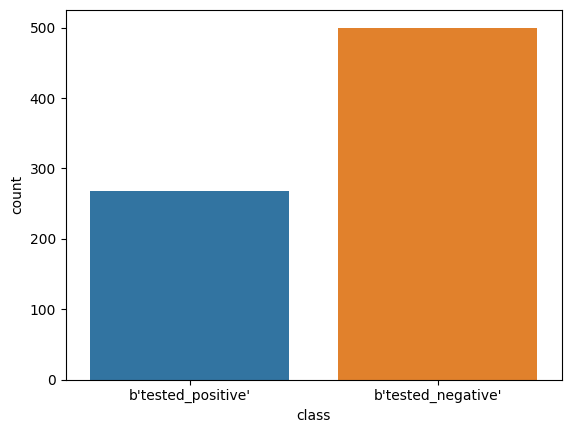

In [13]:
sns.countplot(x = 'class', data = df);

## Numerical Variable EDA
There are 8 numerical columns in this data set. 
* preg - number of times pregnant 
* plas - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* pres - Diastolic blood pressure (mm Hg) 
* skin - Triceps skin fold thickness (mm) 
* insu - 2-Hour serum insulin (mu U/ml) 
* mass - Body mass index (weight in kg/(height in m)^2) 
* pedi - Diabetes pedigree function
* age - Age (years)

In [14]:
num_df = df[numerical_columns].copy()
numerical_columns

['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

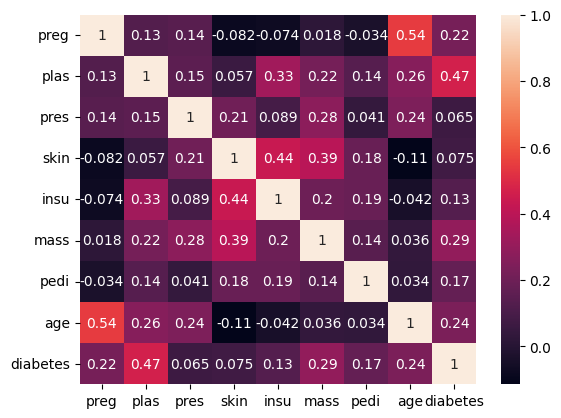

In [15]:
# Correlation of numerical features

#preplotting


#labeling 
label_dict = {"b'tested_positive'": 1, "b'tested_negative'": 0}
num_correlation = num_df.join(df['class'].apply(lambda x: label_dict[str(x)]))
num_correlation = num_correlation.rename({'class': 'diabetes'}, axis = 1)

#plotting
sns.heatmap(num_correlation.corr(), annot = True);


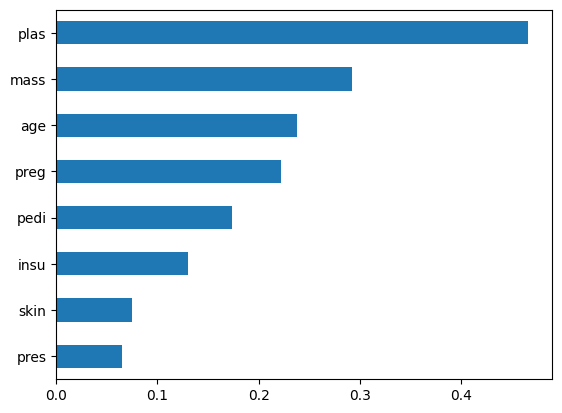

In [16]:
abs(num_correlation.corr()['diabetes']).sort_values()[:-1].plot.barh();

In [17]:
def plot_kde_hist(feature): 
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

    sns.histplot(num_correlation.loc[(num_correlation['diabetes'] == 1)], x=feature, ax=ax[0], kde=True)
    sns.histplot(num_correlation.loc[(num_correlation['diabetes'] == 0)], x=feature, ax=ax[0], kde = True)


    ax[0].set_title(f"Histogram of {feature} based on Diabetes Status")
    ax[0].legend(labels=['Diabetes', 'No Diabetes'])

    sns.kdeplot(num_correlation.loc[(num_correlation['diabetes'] == 1), feature], fill = True, label = 'Yes')
    sns.kdeplot(num_correlation.loc[(num_correlation['diabetes']== 0), feature], fill = True, label = 'No')
    ax[1].set_title(f"KDE of {feature} based on Diabetes Status")
    ax[1].legend(labels=['Diabetes', 'No Diabetes']);

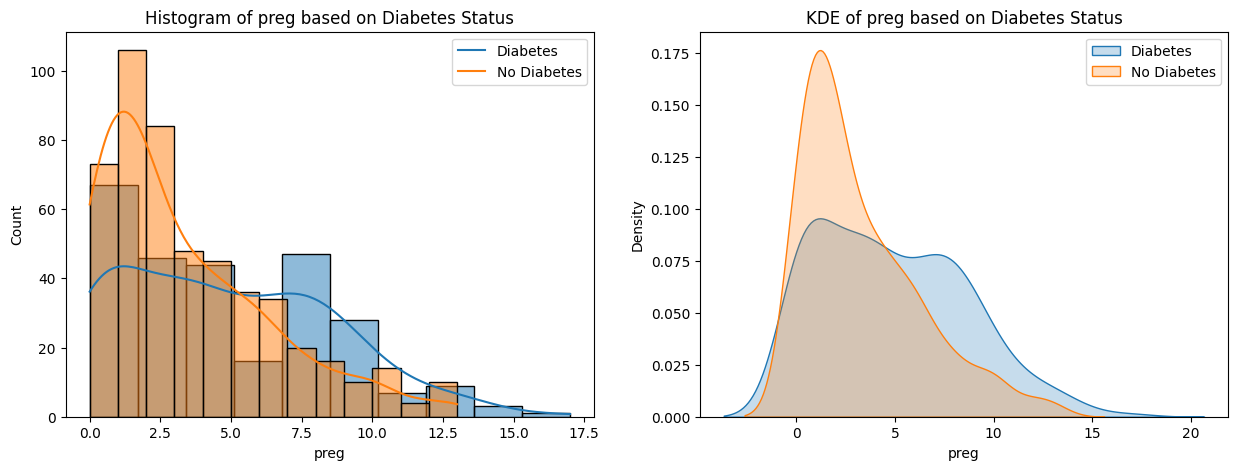

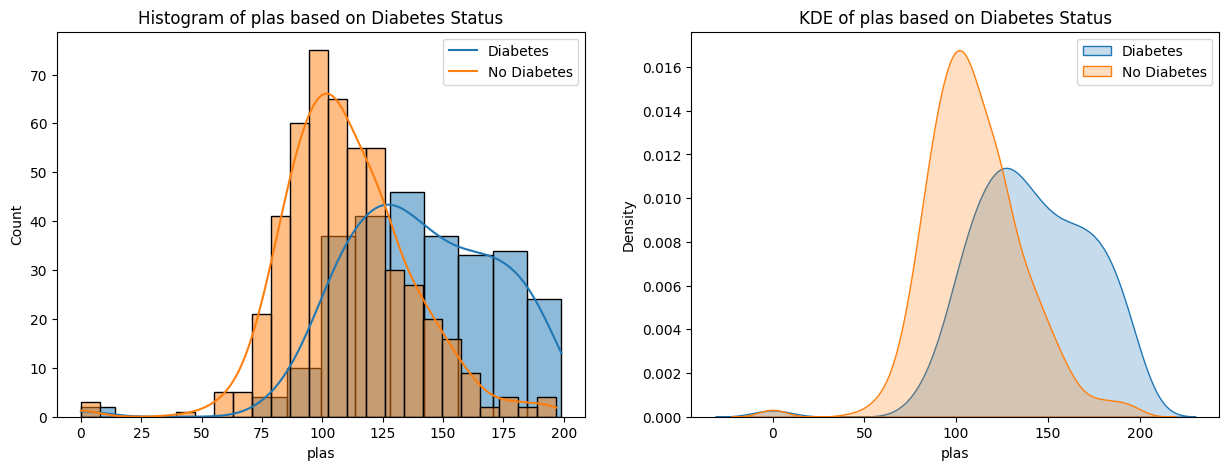

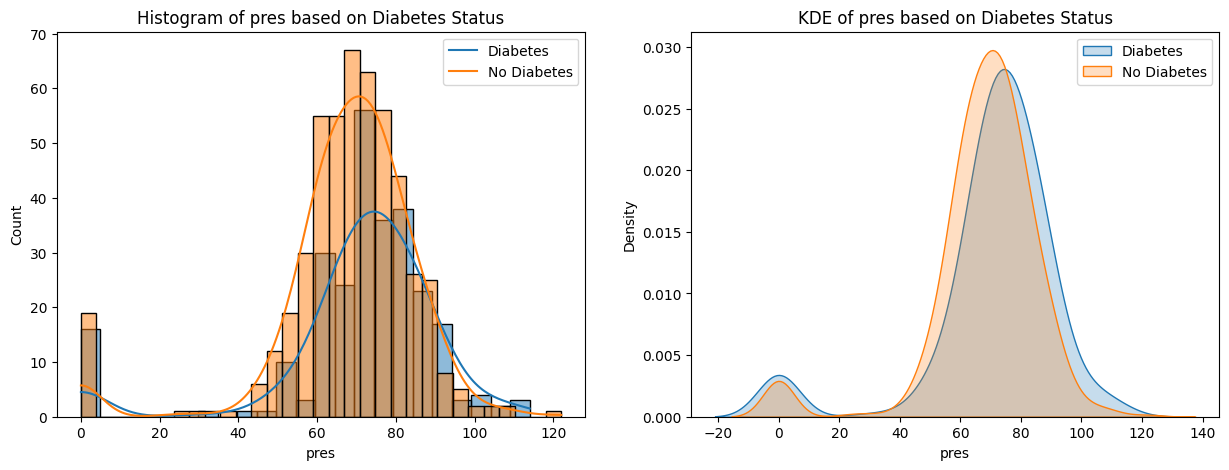

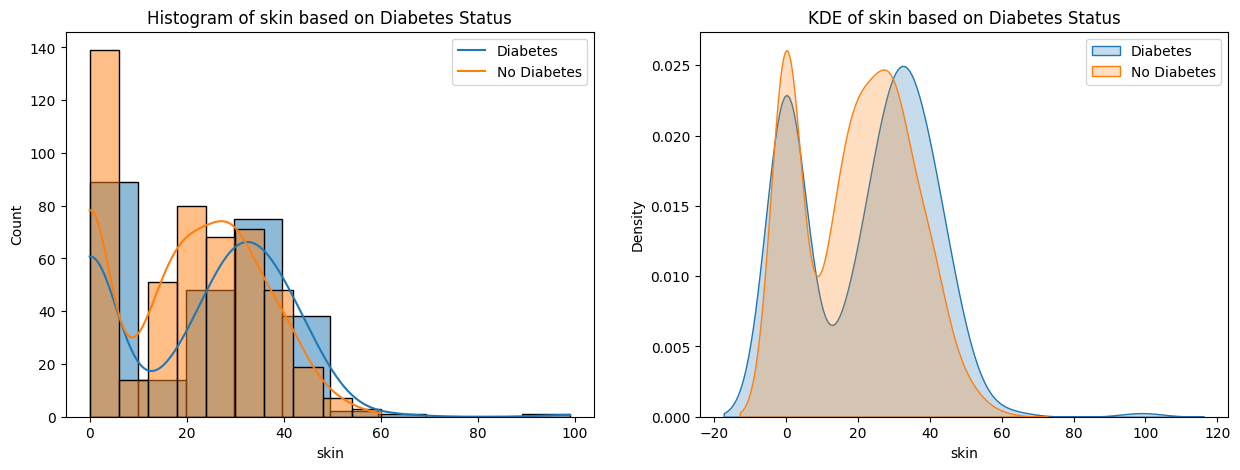

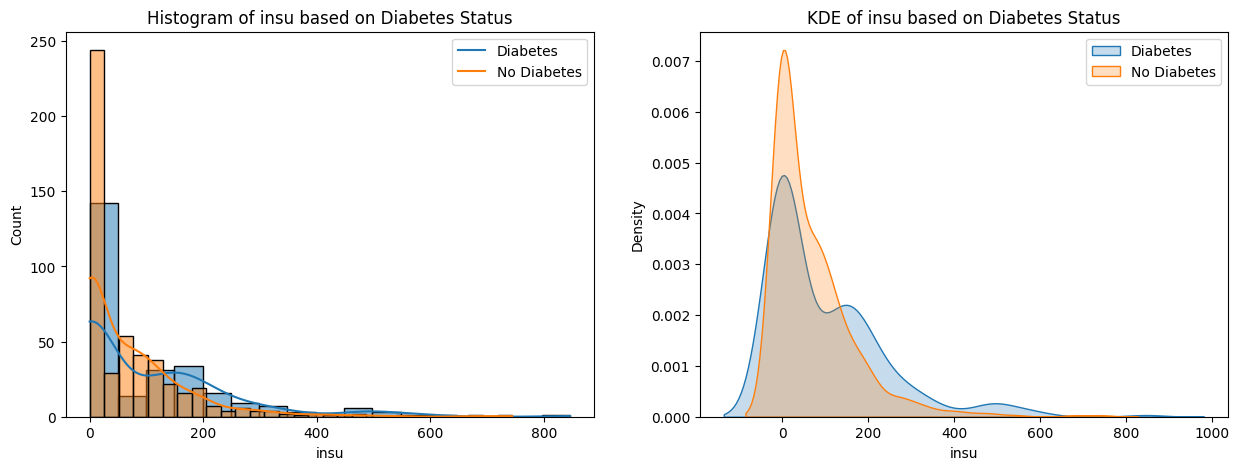

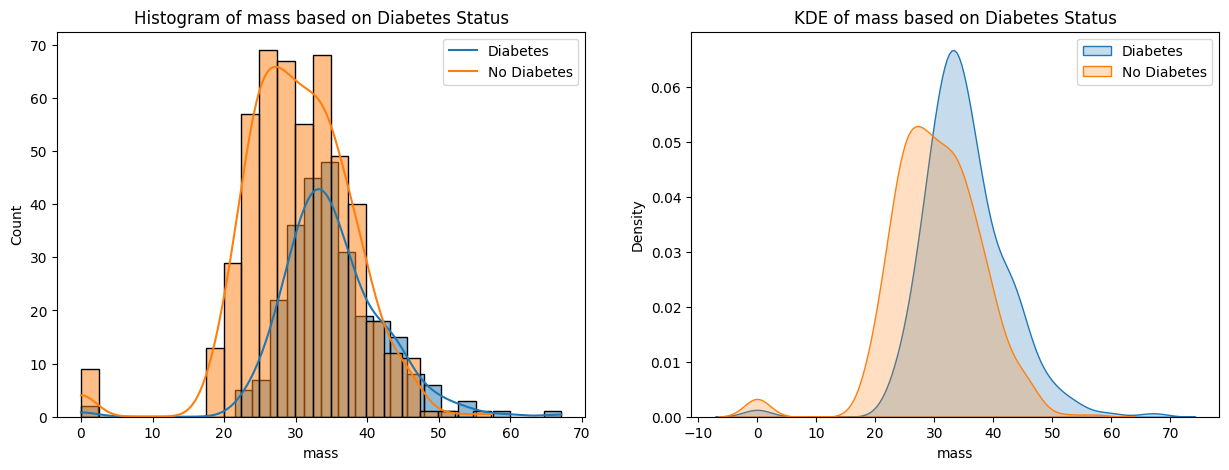

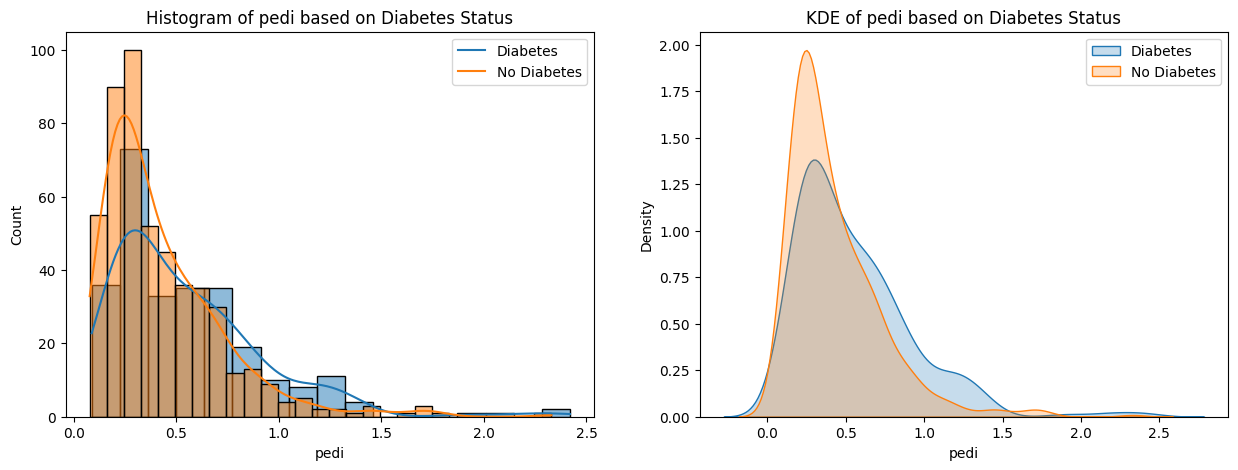

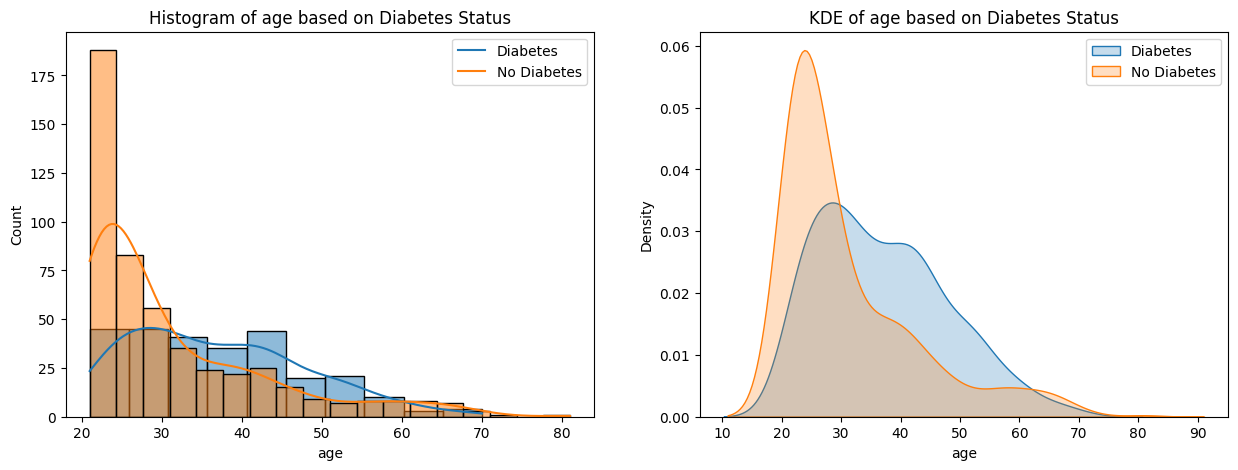

In [18]:
for feature in num_correlation.iloc[:, :-1]:
    plot_kde_hist(feature)

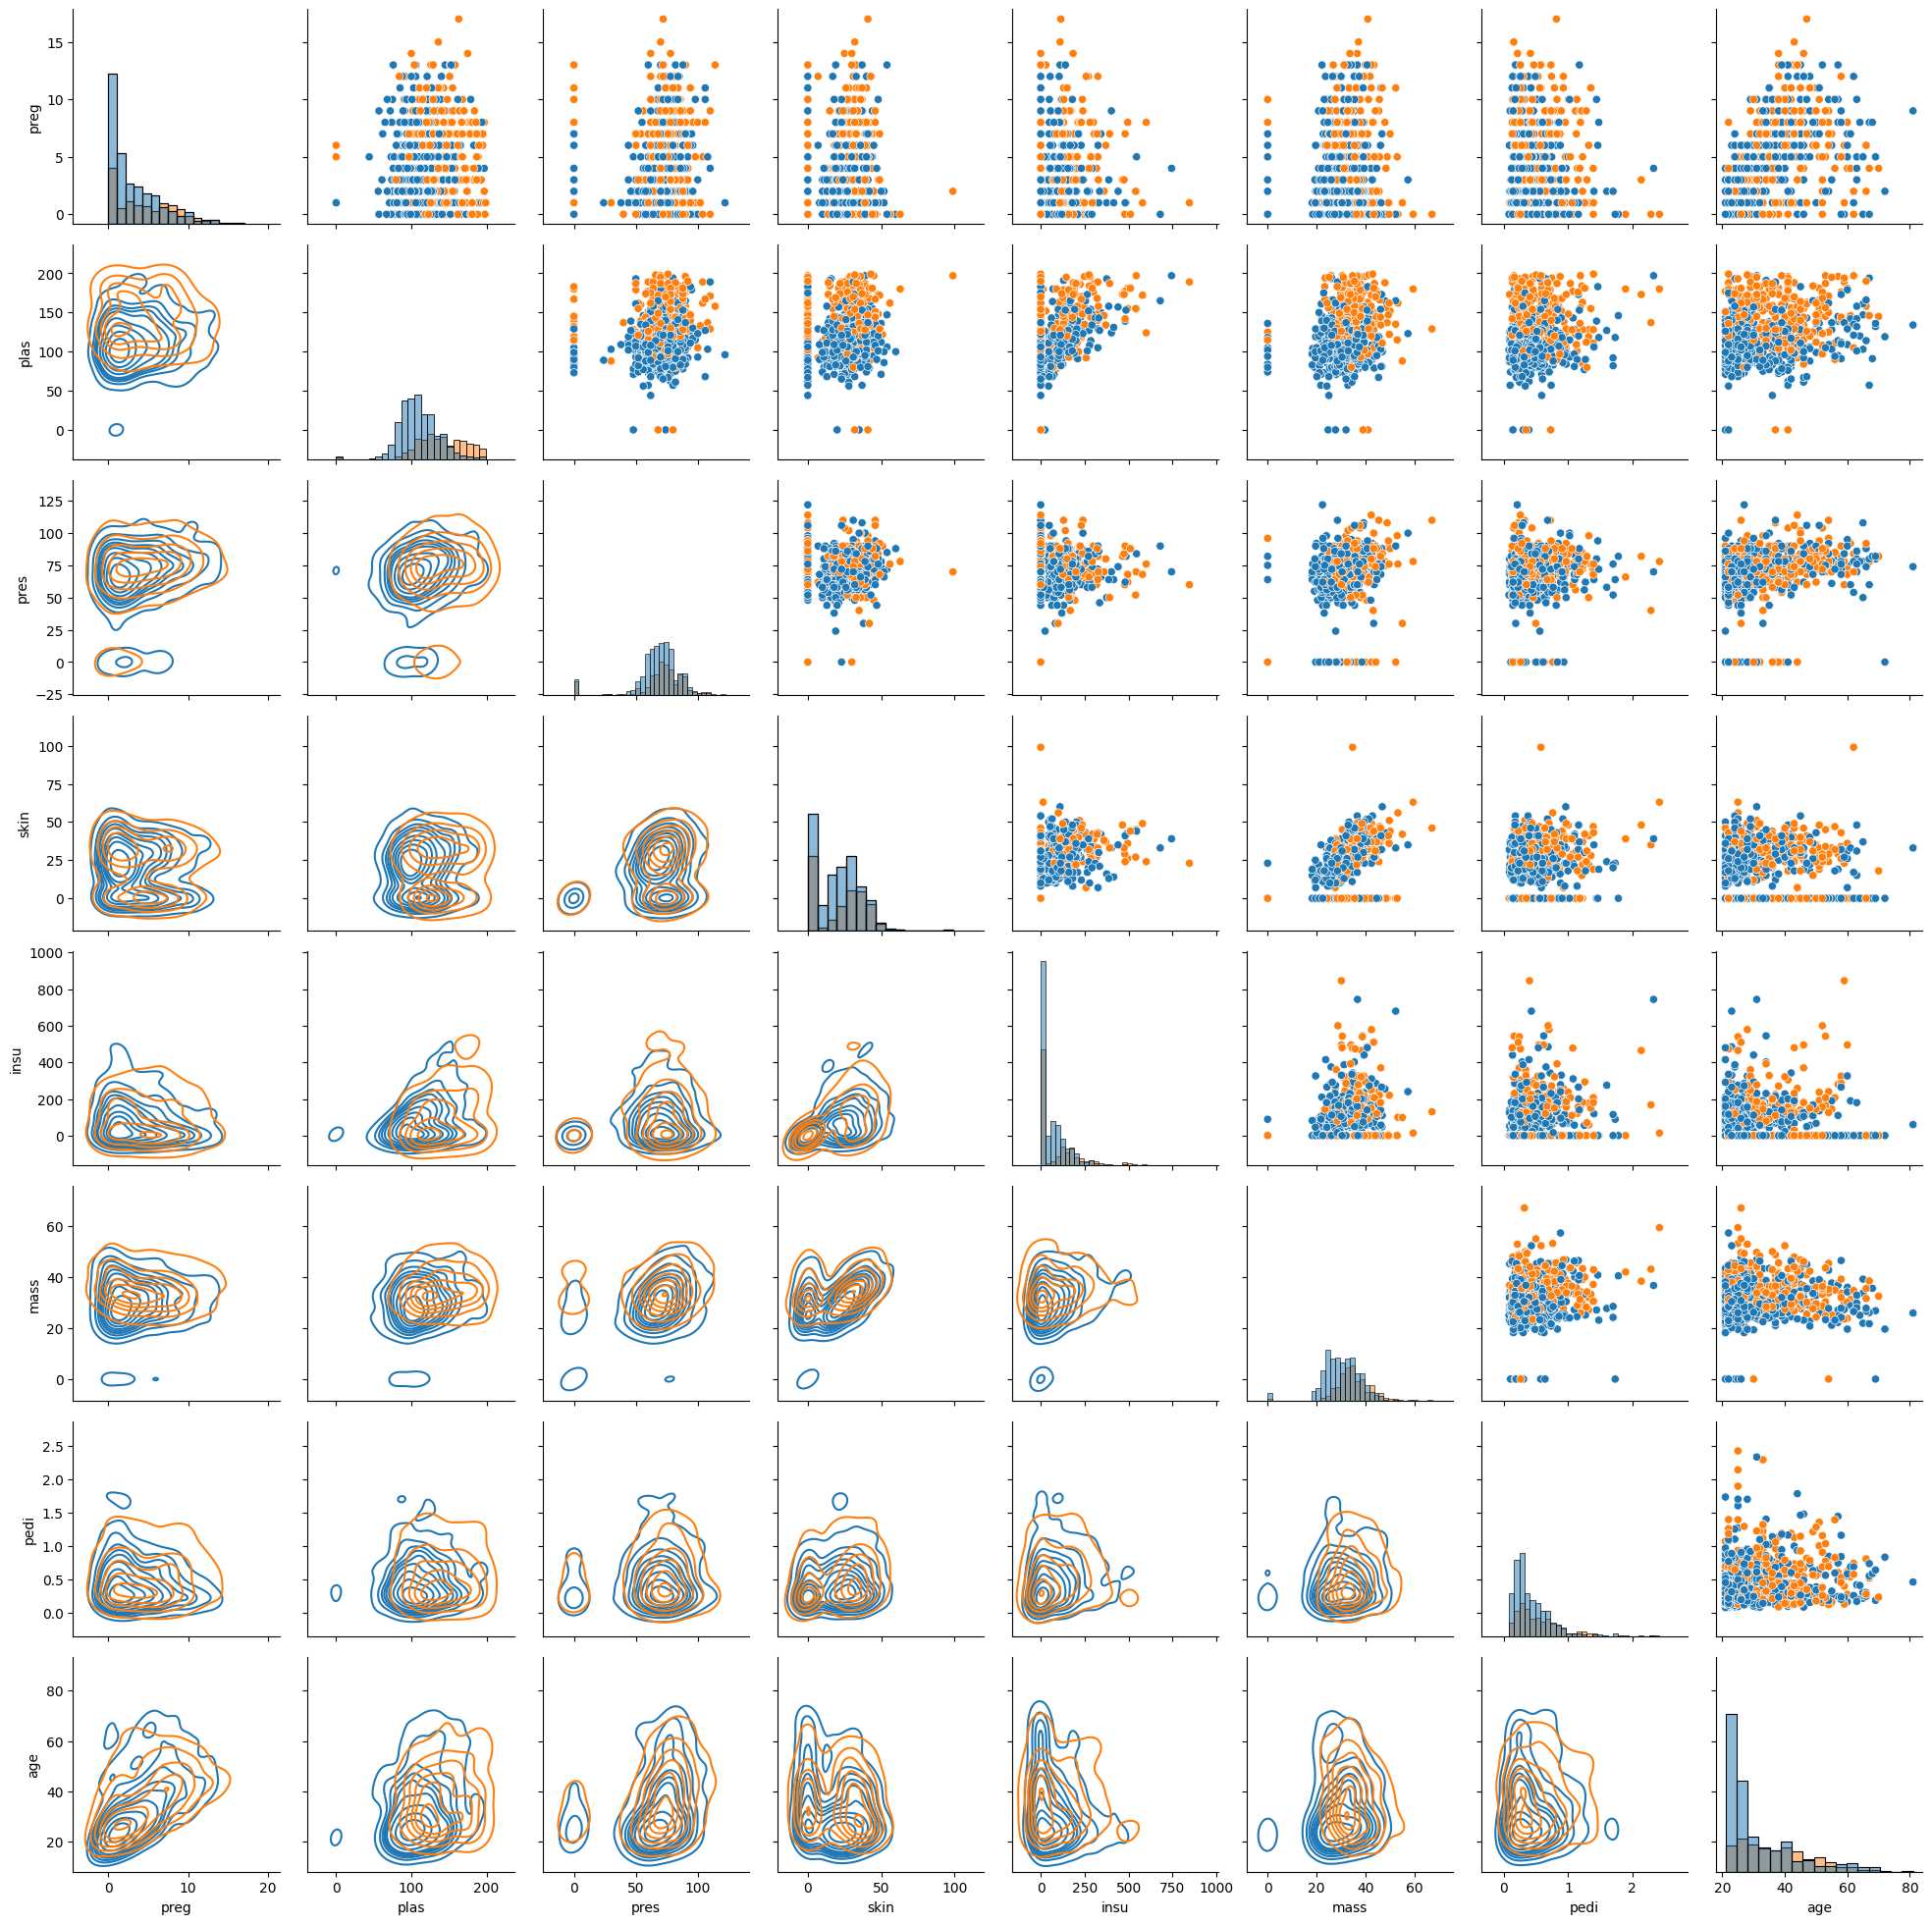

In [19]:
s = sns.PairGrid(num_correlation, hue = 'diabetes') 
s.map_upper(sns.scatterplot)
s.map_diag(sns.histplot) 
s.map_lower(sns.kdeplot);

# Outerlier Detection/Handling

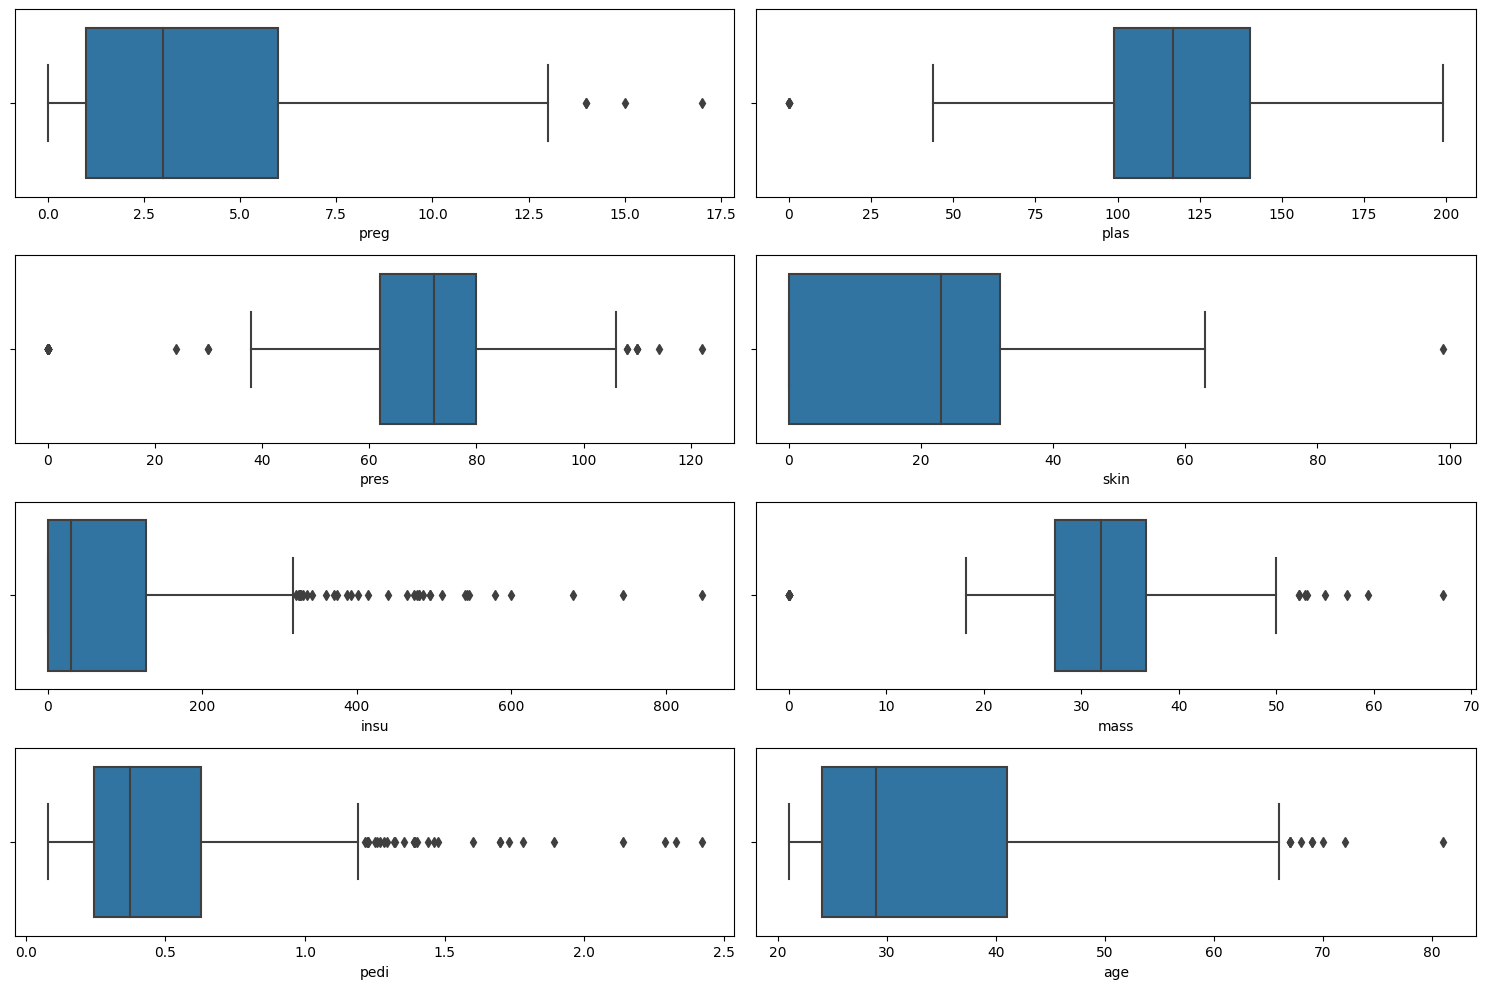

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.set_tight_layout(True)
sns.boxplot(data = num_correlation, x = 'preg', hue = 'diabetes', ax = axes[0,0])
sns.boxplot(data = num_correlation, x = 'plas', hue = 'diabetes', ax = axes[0,1])
sns.boxplot(data = num_correlation, x = 'pres', hue = 'diabetes', ax = axes[1,0])
sns.boxplot(data = num_correlation, x = 'skin', hue = 'diabetes', ax = axes[1,1])
sns.boxplot(data = num_correlation, x = 'insu', hue = 'diabetes', ax = axes[2,0])
sns.boxplot(data = num_correlation, x = 'mass', hue = 'diabetes', ax = axes[2,1])
sns.boxplot(data = num_correlation, x = 'pedi', hue = 'diabetes', ax = axes[3,0])
sns.boxplot(data = num_correlation, x = 'age', hue = 'diabetes', ax = axes[3,1]);

In [21]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))
outlier_count = outliers.sum()

In [22]:
for column in outlier_count.index:
    count = outlier_count[column]
    print(f'{column} has {count} outlier/s')

preg has 4 outlier/s
plas has 5 outlier/s
pres has 45 outlier/s
skin has 1 outlier/s
insu has 34 outlier/s
mass has 19 outlier/s
pedi has 29 outlier/s
age has 9 outlier/s


In [23]:
# percentage of outliers
outlier_count.sort_values(ascending = False)/len(df)

pres    0.058594
insu    0.044271
pedi    0.037760
mass    0.024740
age     0.011719
plas    0.006510
preg    0.005208
skin    0.001302
dtype: float64

### Filter Approach 1: Naive Filtering 
We will filter on the feature with the most outliers.

In [24]:
pres_outliers = outliers['pres']

filtered_df = df[pres_outliers == False].drop('class', axis = 1)
df.shape[0] - filtered_df.shape[0]

45

In [25]:
# see state of data after filtering on one column 


outliers_filt = ((filtered_df < (Q1 - 1.5 * IQR)) | (filtered_df > (Q3 + 1.5 * IQR)))
outlier_count_filt = outliers_filt.sum()
outlier_count_filt

# still alot of outliers 


preg     4
plas     5
pres     0
skin     1
insu    34
mass     9
pedi    29
age      8
dtype: int64

### Filtering Appaoch 2: Extreme filtering 
Remove all outliers

In [26]:
count = outliers.copy()
count['total_outliers'] = count.sum(axis = 1)
count['total_outliers'].head()

0    0
1    0
2    0
3    0
4    1
Name: total_outliers, dtype: int64

In [27]:
#to allow repeatability 
df = pd.DataFrame(data[0])
filtered_df = df[count['total_outliers'] < 1]
print(str(df.shape[0] - filtered_df.shape[0]) + " instances removed")
print(str((df.shape[0] - filtered_df.shape[0])/len(df)) + "% data removed")

129 instances removed
0.16796875% data removed


In [28]:
filtered_df.shape

(639, 9)

In [29]:
df.shape

(768, 9)

In [30]:
outliers_filt = ((filtered_df < (Q1 - 1.5 * IQR)) | (filtered_df > (Q3 + 1.5 * IQR)))
outlier_count_filt = outliers_filt.sum()
outlier_count_filt

C:\Users\Dennis\AppData\Local\Temp\ipykernel_4668\3682124233.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



age      0
class    0
insu     0
mass     0
pedi     0
plas     0
preg     0
pres     0
skin     0
dtype: int64

# Feature Engineering 

We now will perform standard feature engineering on the data set. To this end, we will normalize numerical data (['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']). We will remove rows where there are blatantly incorrect data entries - such as '0' for blood pressure, BMI, and glucose. Then we will create a variable for normal & abnormal BMI - because this is a factor that is commonly associated with diabetes (being overweight). We will also create features for normal/abnormal insulin levels, and normal/elevated/high diastolic blood pressure. Lastly, we characterize normal, pre-diabetes, and diabetes indicating plasma glucose levels as one hot encoded variable. 

Finally, we will assign all features to the X variable, and the outcome to the Y variable to prep for the model selection and implementation. 

In [31]:
# Allows us to rerun cell 
data = loadarff('dataset_37_diabetes.arff')
df = pd.DataFrame(data[0])

# Transform the target column 
label_dict = {"b'tested_positive'": 1, "b'tested_negative'": 0}
df['class'] = df['class'].apply(lambda x: label_dict[str(x)])
df= df.rename({'class': 'diabetes'}, axis = 1)

In [32]:
df[['diabetes']].head(2)

diabetes
0         1
1         0

In [33]:
# do same for filtered df
filtered_df['class'] = filtered_df['class'].apply(lambda x: label_dict[str(x)])
filtered_df= filtered_df.rename({'class': 'diabetes'}, axis = 1)
filtered_df[['diabetes']].head(2)

diabetes
0         1
1         0

### New Variables: Normal/Abnormal BMI

Characterization of weight may be associated with diabetes. This feature categorizes participants' weights into 4 categories. According to the CDC (https://www.cdc.gov › healthyweight › assessing) "If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range." I created these columns as one hot encoded values so they could immediately be plugged into the model. 

In [34]:
def bmi_class(df): 
    if df['mass'] < 18.5: 
        return 'Underweight' 
    elif df['mass'] <= 24.9: 
        return 'Normal' 
    elif df['mass'] <= 29.9 :
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_class'] = df.apply(bmi_class, axis = 1)
df[['mass', 'bmi_class']].head().T


0           1       2           3      4
mass        33.6        26.6    23.3        28.1   43.1
bmi_class  Obese  Overweight  Normal  Overweight  Obese

In [35]:
# Create dummie variables
# remove original column 
# keep dummies 

df = pd.get_dummies(df, columns = ['bmi_class'])
df.head()

preg   plas  pres  skin   insu  mass   pedi   age  diabetes  \
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0         1   
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0         0   
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0         1   
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0         0   
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0         1   

   bmi_class_Normal  bmi_class_Obese  bmi_class_Overweight  \
0                 0                1                     0   
1                 0                0                     1   
2                 1                0                     0   
3                 0                0                     1   
4                 0                1                     0   

   bmi_class_Underweight  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [36]:
# do the same for filtered data 

filtered_df['bmi_class'] = filtered_df.apply(bmi_class, axis = 1)
filtered_df = pd.get_dummies(filtered_df, columns = ['bmi_class'])

### New Variables: Normal/Abnormal Insulin Level 

Insulin level may be another characteristic factor of diabetes. Normal levels (https://emedicine.medscape.com/article/2089224-overview) are 16-166 mIU/L 2 hours after glucose administration, which I added below as one hot encoded variable. 

In [37]:
def insulin_class(df): 
    if df['insu'] < 16 or df['insu'] > 166: 
        return 'Abnormal_Insulin' 
    else:
        return 'Normal'

df['insulin_class'] = df.apply(insulin_class, axis = 1)
df[['insu', 'insulin_class']].head().T

0                 1                 2       3  \
insu                        0.0               0.0               0.0    94.0   
insulin_class  Abnormal_Insulin  Abnormal_Insulin  Abnormal_Insulin  Normal   

                              4  
insu                      168.0  
insulin_class  Abnormal_Insulin

In [38]:
# Create dummie variables
# remove original column 
# keep dummies 

df = pd.get_dummies(df, columns = ['insulin_class'])
df.head()

preg   plas  pres  skin   insu  mass   pedi   age  diabetes  \
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0         1   
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0         0   
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0         1   
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0         0   
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0         1   

   bmi_class_Normal  bmi_class_Obese  bmi_class_Overweight  \
0                 0                1                     0   
1                 0                0                     1   
2                 1                0                     0   
3                 0                0                     1   
4                 0                1                     0   

   bmi_class_Underweight  insulin_class_Abnormal_Insulin  insulin_class_Normal  
0                      0                               1                     0  
1                      0                               1                     0  
2                      0                               1                     0  
3                      0                               0                     1  
4                      0                               1                     0

In [39]:
# do the same for filtered data 

filtered_df['insulin_class'] = filtered_df.apply(insulin_class, axis = 1)
filtered_df = pd.get_dummies(filtered_df, columns = ['insulin_class'])

### New Variable: Blood Pressure Ratings 

Normal, elevated, and high blood pressure for diastolic blood pressure is <80, 80-89, and >90 respectively (https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings). The feature below adds these characteristics to the model as one hot-encoded variables. 

In [40]:
def bp_class(df): 
    if df['pres'] < 80: 
        return 'Normal_BP' 
    elif df['pres'] < 89: 
        return 'Elevated_BP' 
    else:
        return 'High_BP'

df['bp_class'] = df.apply(bp_class, axis = 1)
df[['pres', 'bp_class']].head().T


0          1          2          3          4
pres           72.0       66.0       64.0       66.0       40.0
bp_class  Normal_BP  Normal_BP  Normal_BP  Normal_BP  Normal_BP

In [41]:
# Create dummie variables
# remove original column 
# keep dummies 

df = pd.get_dummies(df, columns = ['bp_class'])
df.head()

preg   plas  pres  skin   insu  mass   pedi   age  diabetes  \
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0         1   
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0         0   
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0         1   
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0         0   
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0         1   

   bmi_class_Normal  bmi_class_Obese  bmi_class_Overweight  \
0                 0                1                     0   
1                 0                0                     1   
2                 1                0                     0   
3                 0                0                     1   
4                 0                1                     0   

   bmi_class_Underweight  insulin_class_Abnormal_Insulin  \
0                      0                               1   
1                      0                               1   
2                      0                               1   
3                      0                               0   
4                      0                               1   

   insulin_class_Normal  bp_class_Elevated_BP  bp_class_High_BP  \
0                     0                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     1                     0                 0   
4                     0                     0                 0   

   bp_class_Normal_BP  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [42]:
# do the same for filtered data 

filtered_df['bp_class'] = filtered_df.apply(bp_class, axis = 1)
filtered_df = pd.get_dummies(filtered_df, columns = ['bp_class'])

### New Variable: Glucose Level 

According to a UCSF paper: "Two hours after the glucose drink  your plasma glucose normally is less than 140 mg/dl. Values from 140mg/dl to 199 mg/dl indicate that you have pre-diabetes. You have diabetes if the plasma glucose levels are equal to or greater than 200 mg/dl. " (https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/). This variable takes the 2 hour gluclose plasma reading and turns it into these categories as one hot encoded variables. 

In [43]:
def glucose_class(df): 
    if df['plas'] < 140: 
        return 'Normal_glucose' 
    elif df['plas'] < 199:
        return 'Pre_diabetes_glucose' 
    else:
        return 'Diabetes_glucose'

df['glucose_class'] = df.apply(glucose_class, axis = 1)
df[['plas', 'glucose_class']].head().T


0               1                     2  \
plas                          148.0            85.0                 183.0   
glucose_class  Pre_diabetes_glucose  Normal_glucose  Pre_diabetes_glucose   

                            3               4  
plas                     89.0           137.0  
glucose_class  Normal_glucose  Normal_glucose

In [44]:
# Create dummie variables
# remove original column 
# keep dummies 

df = pd.get_dummies(df, columns = ['glucose_class'])
df.head()

preg   plas  pres  skin   insu  mass   pedi   age  diabetes  \
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0         1   
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0         0   
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0         1   
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0         0   
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0         1   

   bmi_class_Normal  ...  bmi_class_Overweight  bmi_class_Underweight  \
0                 0  ...                     0                      0   
1                 0  ...                     1                      0   
2                 1  ...                     0                      0   
3                 0  ...                     1                      0   
4                 0  ...                     0                      0   

   insulin_class_Abnormal_Insulin  insulin_class_Normal  bp_class_Elevated_BP  \
0                               1                     0                     0   
1                               1                     0                     0   
2                               1                     0                     0   
3                               0                     1                     0   
4                               1                     0                     0   

   bp_class_High_BP  bp_class_Normal_BP  glucose_class_Diabetes_glucose  \
0                 0                   1                               0   
1                 0                   1                               0   
2                 0                   1                               0   
3                 0                   1                               0   
4                 0                   1                               0   

   glucose_class_Normal_glucose  glucose_class_Pre_diabetes_glucose  
0                             0                                   1  
1                             1                                   0  
2                             0                                   1  
3                             1                                   0  
4                             1                                   0  

[5 rows x 21 columns]

In [45]:
# do the same for filtered data 

filtered_df['glucose_class'] = filtered_df.apply(glucose_class, axis = 1)
filtered_df = pd.get_dummies(filtered_df, columns = ['glucose_class'])

### Normalizing Numerical Data

In [46]:
scaler = StandardScaler() 
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

preg      plas      pres      skin      insu      mass      pedi  \
0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   

        age  diabetes  bmi_class_Normal  ...  bmi_class_Overweight  \
0  1.425995         1                 0  ...                     0   
1 -0.190672         0                 0  ...                     1   
2 -0.105584         1                 1  ...                     0   
3 -1.041549         0                 0  ...                     1   
4 -0.020496         1                 0  ...                     0   

   bmi_class_Underweight  insulin_class_Abnormal_Insulin  \
0                      0                               1   
1                      0                               1   
2                      0                               1   
3                      0                               0   
4                      0                               1   

   insulin_class_Normal  bp_class_Elevated_BP  bp_class_High_BP  \
0                     0                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     1                     0                 0   
4                     0                     0                 0   

   bp_class_Normal_BP  glucose_class_Diabetes_glucose  \
0                   1                               0   
1                   1                               0   
2                   1                               0   
3                   1                               0   
4                   1                               0   

   glucose_class_Normal_glucose  glucose_class_Pre_diabetes_glucose  
0                             0                                   1  
1                             1                                   0  
2                             0                                   1  
3                             1                                   0  
4                             1                                   0  

[5 rows x 21 columns]

In [47]:
#do same for filtered data
filtered_df[numerical_columns] = scaler.fit_transform(filtered_df[numerical_columns])
filtered_df.head()

preg      plas      pres      skin      insu      mass      pedi  \
0  0.673824  0.991351 -0.010626  0.941847 -0.829247  0.247974  0.788892   
1 -0.860651 -1.170674 -0.539736  0.550406 -0.829247 -0.840853 -0.311759   
2  1.287615  2.192476 -0.716106 -1.341558 -0.829247 -1.354158  0.968346   
3 -0.860651 -1.033403 -0.539736  0.158965  0.353035 -0.607533 -1.045526   
5  0.366929 -0.106820  0.165744 -1.341558 -0.829247 -0.996400 -0.909939   

        age  diabetes  bmi_class_Normal  bmi_class_Obese  \
0  1.561132         1                 0                1   
1 -0.154912         0                 0                0   
2 -0.064594         1                 1                0   
3 -1.058093         0                 0                0   
5 -0.245230         0                 0                0   

   bmi_class_Overweight  bmi_class_Underweight  \
0                     0                      0   
1                     1                      0   
2                     0                      0   
3                     1                      0   
5                     1                      0   

   insulin_class_Abnormal_Insulin  insulin_class_Normal  bp_class_Elevated_BP  \
0                               1                     0                     0   
1                               1                     0                     0   
2                               1                     0                     0   
3                               0                     1                     0   
5                               1                     0                     0   

   bp_class_High_BP  bp_class_Normal_BP  glucose_class_Normal_glucose  \
0                 0                   1                             0   
1                 0                   1                             1   
2                 0                   1                             0   
3                 0                   1                             1   
5                 0                   1                             1   

   glucose_class_Pre_diabetes_glucose  
0                                   1  
1                                   0  
2                                   1  
3                                   0  
5                                   0

In [48]:
df.shape, filtered_df.shape

((768, 21), (639, 20))

In [49]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',
       'diabetes', 'bmi_class_Normal', 'bmi_class_Obese',
       'bmi_class_Overweight', 'bmi_class_Underweight',
       'insulin_class_Abnormal_Insulin', 'insulin_class_Normal',
       'bp_class_Elevated_BP', 'bp_class_High_BP', 'bp_class_Normal_BP',
       'glucose_class_Diabetes_glucose', 'glucose_class_Normal_glucose',
       'glucose_class_Pre_diabetes_glucose'],
      dtype='object')

In [50]:
# filtered data does not have any information on subjects with high (pre diabetes) glucose level
filtered_df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',
       'diabetes', 'bmi_class_Normal', 'bmi_class_Obese',
       'bmi_class_Overweight', 'bmi_class_Underweight',
       'insulin_class_Abnormal_Insulin', 'insulin_class_Normal',
       'bp_class_Elevated_BP', 'bp_class_High_BP', 'bp_class_Normal_BP',
       'glucose_class_Normal_glucose', 'glucose_class_Pre_diabetes_glucose'],
      dtype='object')

### Prepare Data for Modeling: X, Y Split 

In [51]:
X = df.drop(['diabetes'], axis =1)
Y = df['diabetes']

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   preg                                768 non-null    float64
 1   plas                                768 non-null    float64
 2   pres                                768 non-null    float64
 3   skin                                768 non-null    float64
 4   insu                                768 non-null    float64
 5   mass                                768 non-null    float64
 6   pedi                                768 non-null    float64
 7   age                                 768 non-null    float64
 8   bmi_class_Normal                    768 non-null    uint8  
 9   bmi_class_Obese                     768 non-null    uint8  
 10  bmi_class_Overweight                768 non-null    uint8  
 11  bmi_class_Underweight               768 non-n

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [54]:
X_filt = filtered_df.drop(['diabetes'], axis =1)
Y_filt = filtered_df['diabetes']

In [55]:
X_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   preg                                639 non-null    float64
 1   plas                                639 non-null    float64
 2   pres                                639 non-null    float64
 3   skin                                639 non-null    float64
 4   insu                                639 non-null    float64
 5   mass                                639 non-null    float64
 6   pedi                                639 non-null    float64
 7   age                                 639 non-null    float64
 8   bmi_class_Normal                    639 non-null    uint8  
 9   bmi_class_Obese                     639 non-null    uint8  
 10  bmi_class_Overweight                639 non-null    uint8  
 11  bmi_class_Underweight               639 non-n

In [56]:
X_train_filt, X_test_filt, Y_train_filt, Y_test_filt = train_test_split(X_filt, Y_filt, test_size = 0.25, random_state = 0)

# Supervised Modeling 

## Simple Random Forest (Non-tuned)



### Model on Non-Filtered Data

In [57]:
# Simple Classifier as baseline for non filtered data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train) 
Y_preds = clf.predict(X_test)

#### Results

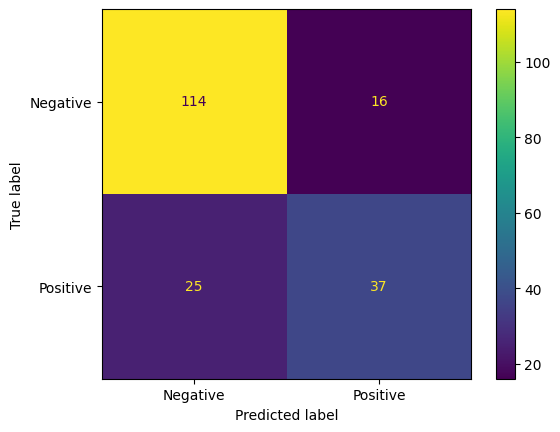

In [58]:
cm = confusion_matrix(Y_test, Y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

#### Classification Report 

In [59]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test, Y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



#### K-Fold Cross Validation 
K = 10 (picked aribtrary k)

In [60]:
# KFold Cross Validation (K = 10)
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = RandomForestClassifier(random_state = 0)
cv_results = cross_validate(cv_model, X, Y, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df


fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.149760    0.011981        0.607143     0.629630  0.618182       0.727273
1  0.135783    0.010983        0.714286     0.555556  0.625000       0.766234
2  0.129293    0.011482        0.666667     0.518519  0.583333       0.740260
3  0.144768    0.011482        0.516129     0.592593  0.551724       0.662338
4  0.127796    0.011482        0.800000     0.444444  0.571429       0.766234
5  0.184705    0.010982        0.818182     0.666667  0.734694       0.831169
6  0.188199    0.010983        0.727273     0.592593  0.653061       0.779221
7  0.130791    0.011981        0.826087     0.703704  0.760000       0.844156
8  0.134784    0.010483        0.571429     0.461538  0.510638       0.697368
9  0.129293    0.010982        0.826087     0.730769  0.775510       0.855263

In [61]:
# Average Statistics
cv_df.mean()

fit_time          0.145517
score_time        0.011282
test_precision    0.707328
test_recall       0.589601
test_f1           0.638357
test_accuracy     0.766951
dtype: float64

#### ROC/AUC and Precision Recall Plotting

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



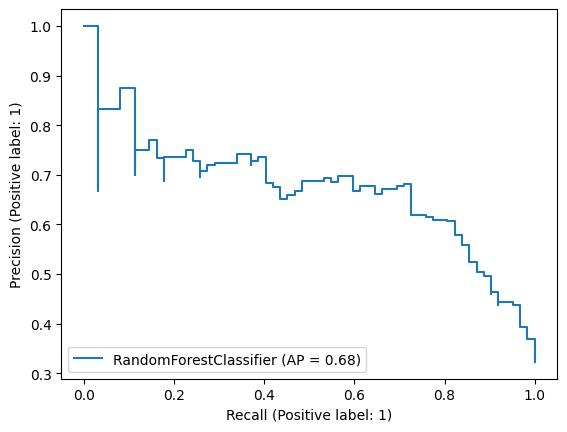

In [62]:
plot_precision_recall_curve(clf, X_test, Y_test);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



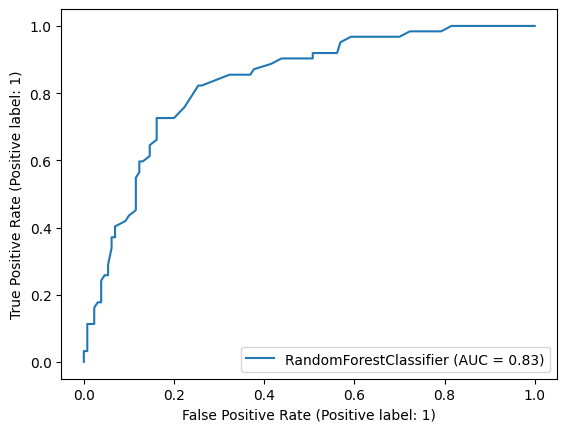

In [63]:
plot_roc_curve(clf, X_test, Y_test);

#### Feature importance based on mean decrease in impurity

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each model.

In [64]:
feature_names = np.array(X_train.columns)
importances = clf.feature_importances_
std = np.std([estimator.feature_importances_ for estimator in clf.estimators_], axis=0)
clf_importances = pd.Series(importances, index=feature_names).sort_values(ascending = False)


In [65]:
clf_importances

plas                                  0.178425
mass                                  0.120985
pedi                                  0.113472
age                                   0.111991
preg                                  0.075495
pres                                  0.073347
skin                                  0.065939
insu                                  0.060411
glucose_class_Pre_diabetes_glucose    0.053463
glucose_class_Normal_glucose          0.048437
bmi_class_Obese                       0.021837
bp_class_Elevated_BP                  0.014524
bmi_class_Overweight                  0.012124
bmi_class_Normal                      0.011337
insulin_class_Normal                  0.011233
bp_class_Normal_BP                    0.010538
insulin_class_Abnormal_Insulin        0.009615
bp_class_High_BP                      0.005804
bmi_class_Underweight                 0.001023
glucose_class_Diabetes_glucose        0.000000
dtype: float64

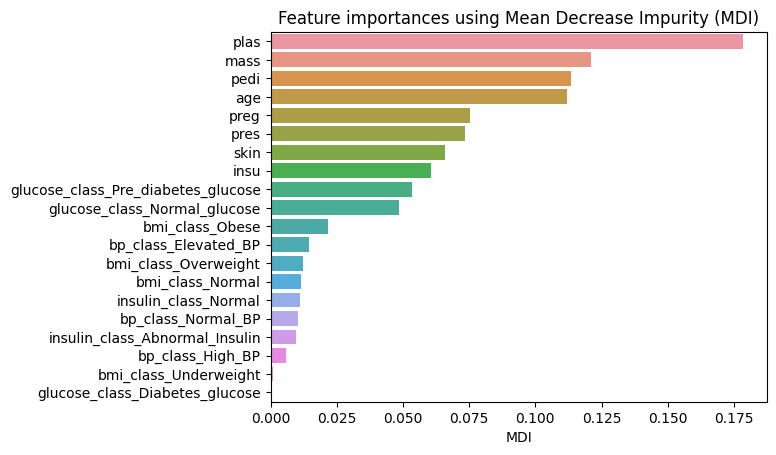

In [66]:
sns.barplot(x = clf_importances.values, y = clf_importances.index)
plt.title("Feature importances using Mean Decrease Impurity (MDI)")
plt.xlabel("MDI")
plt.show()


#### Permutation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [67]:
clf = RandomForestClassifier(random_state=0).fit(X_train, Y_train)
perm = PermutationImportance(clf, random_state=0).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [68]:
perm_dict = dict(feature_names=X.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

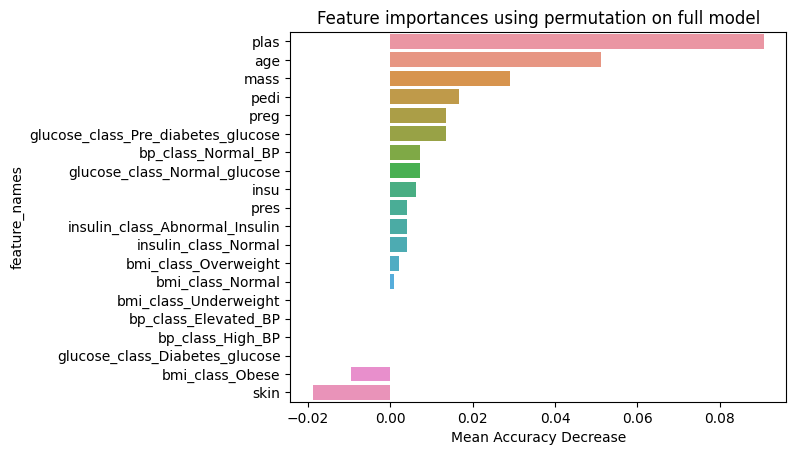

In [69]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [70]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]
fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig


### Filtered Data

In [71]:
# Simple Classifier as baseline for filtered data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_filt, Y_train_filt) 
Y_preds_filt = clf.predict(X_test_filt)

#### Results

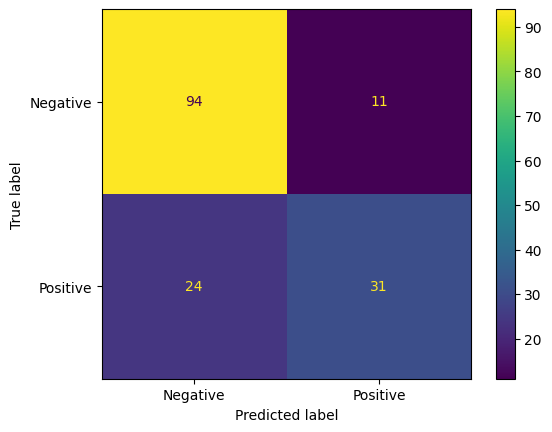

In [72]:
cm = confusion_matrix(Y_test_filt, Y_preds_filt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

#### Classification Report 

In [73]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test_filt, Y_preds_filt)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.74      0.56      0.64        55

    accuracy                           0.78       160
   macro avg       0.77      0.73      0.74       160
weighted avg       0.78      0.78      0.77       160



#### K-Fold Cross Validation

In [74]:
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = RandomForestClassifier(random_state = 0)
cv_results = cross_validate(cv_model, X_filt, Y_filt, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.164237    0.015974        0.619048         0.65  0.634146       0.765625
1  0.140275    0.010983        0.733333         0.55  0.628571       0.796875
2  0.121805    0.011481        0.562500         0.45  0.500000       0.718750
3  0.130791    0.011981        0.600000         0.60  0.600000       0.750000
4  0.185704    0.022962        0.750000         0.45  0.562500       0.781250
5  0.215155    0.010982        0.692308         0.45  0.545455       0.765625
6  0.154253    0.011981        0.750000         0.45  0.562500       0.781250
7  0.194189    0.014478        0.705882         0.60  0.648649       0.796875
8  0.149261    0.013978        0.666667         0.50  0.571429       0.765625
9  0.142771    0.013479        0.846154         0.55  0.666667       0.825397

In [75]:
# Average Statistics
cv_df.mean()

fit_time          0.159844
score_time        0.013828
test_precision    0.692589
test_recall       0.525000
test_f1           0.591992
test_accuracy     0.774727
dtype: float64

#### ROC/AUC and Precision Recall Plotting

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



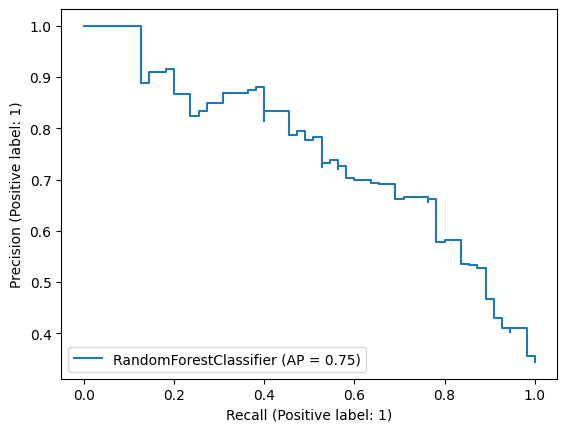

In [76]:
plot_precision_recall_curve(clf, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



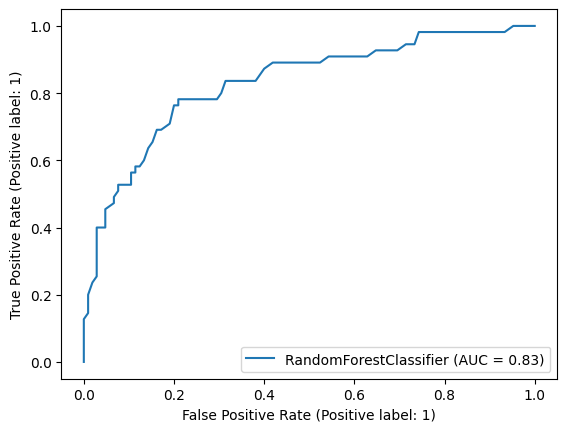

In [77]:
plot_roc_curve(clf, X_test_filt, Y_test_filt);

#### Feature importance based on mean decrease in impurity

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each model.

In [78]:
feature_names = np.array(X_train_filt.columns)
importances = clf.feature_importances_
std = np.std([estimator.feature_importances_ for estimator in clf.estimators_], axis=0)
clf_importances = pd.Series(importances, index=feature_names).sort_values(ascending = False)


In [79]:
clf_importances

plas                                  2.003992e-01
pedi                                  1.152434e-01
age                                   1.131440e-01
mass                                  1.111353e-01
preg                                  8.487336e-02
pres                                  7.863941e-02
skin                                  6.662266e-02
insu                                  5.691592e-02
glucose_class_Pre_diabetes_glucose    4.598249e-02
glucose_class_Normal_glucose          3.919019e-02
bmi_class_Obese                       2.380880e-02
insulin_class_Abnormal_Insulin        1.355298e-02
bp_class_Elevated_BP                  1.053732e-02
bp_class_Normal_BP                    9.528902e-03
bmi_class_Overweight                  9.339628e-03
insulin_class_Normal                  9.277328e-03
bmi_class_Normal                      7.116308e-03
bp_class_High_BP                      4.692284e-03
bmi_class_Underweight                 5.129670e-07
dtype: float64

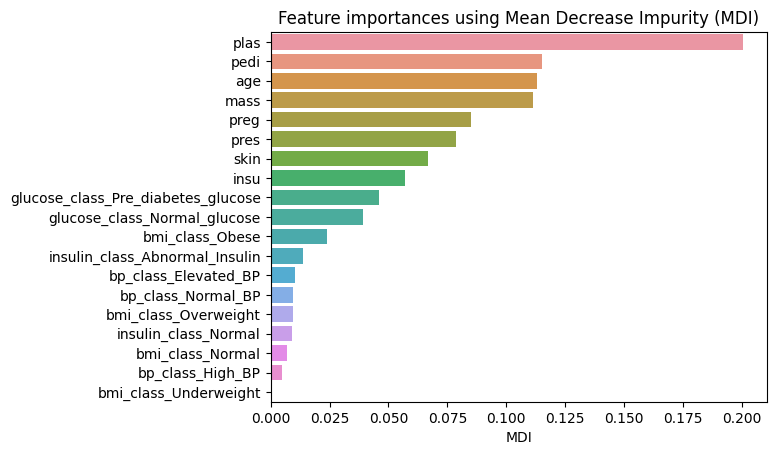

In [80]:
sns.barplot(x = clf_importances.values, y = clf_importances.index)
plt.title("Feature importances using Mean Decrease Impurity (MDI)")
plt.xlabel("MDI")
plt.show()

#### Permuation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [81]:
clf = RandomForestClassifier(random_state=0).fit(X_train_filt, Y_train_filt)
perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test_filt, Y_test_filt)
eli5.show_weights(perm, feature_names = X_test_filt.columns.tolist())

In [82]:
perm_dict = dict(feature_names=X_filt.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

In [83]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [84]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test_filt.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]

fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig

## Parameterized Random Forest (Tuned)



### Non-Filtered Data using Naive Tuning Approach

#### Finding optimal n_estimators

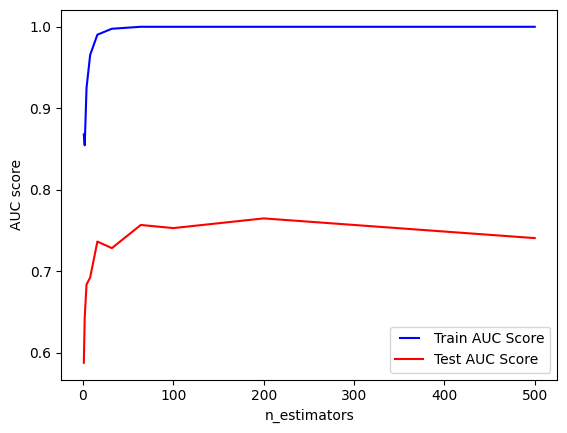

In [85]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC Score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [86]:
results = dict(zip(n_estimators, test_results))

best_n_estimator = max(results, key = results.get)
best_n_estimator

200

#### Finding optimal max_depth

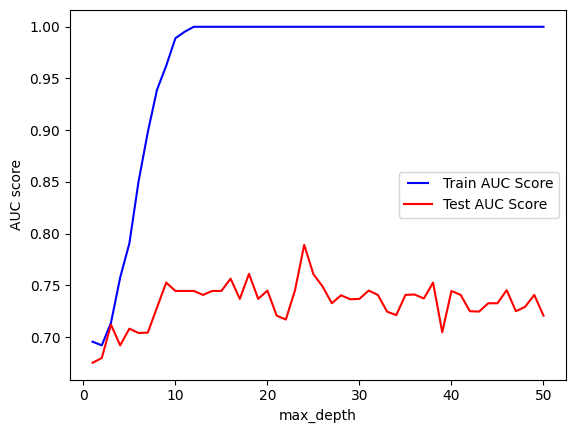

In [87]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth = int(max_depth), n_jobs=-1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC Score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()


In [88]:
results = dict(zip(max_depths, test_results))

In [89]:
best_max_depth = max(results, key = results.get)
best_max_depth


24.0

#### Finding optimal min_samples_split

In [90]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split= min_samples_split, n_jobs=-1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC Score')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

In [91]:
results = dict(zip(min_samples_splits, test_results))

best_min_samples_splits = max(results, key = results.get)
best_min_samples_splits

#increasing this value could lead to underfitting 
#might be able to achieve same performance with default value

0.2

#### Finding optimal min_samples_leaf

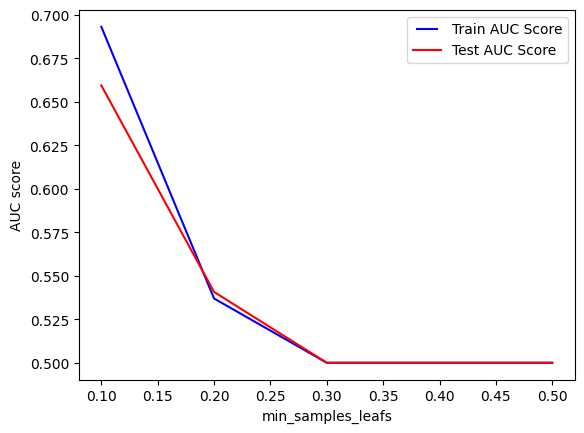

In [92]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs= -1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)



line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC Score')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

In [93]:
# graph shows increasing this parameter will lead to underfitting 
# set to lowest value 
best_min_samples_leafs = 1
best_min_samples_leafs

1

#### Finding optimal max_features

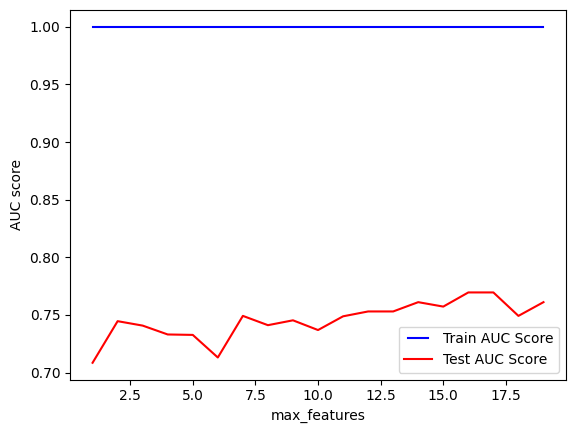

In [94]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature, n_jobs= -1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(max_features, train_results, 'b', label='Train AUC Score')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [95]:
results = dict(zip(max_features, test_results))

best_max_features = max(results, key = results.get)
best_max_features

16

#### Naive Tuned Model on Non-Filtered Data

In [96]:
clf = RandomForestClassifier(n_estimators = best_n_estimator, 
                                max_depth= int(best_max_depth), 
                                min_samples_split= best_min_samples_splits,
                                min_samples_leaf= best_min_samples_leafs, 
                                max_features= best_max_features, 
                                random_state=0)
clf.fit(X_train, Y_train) 
Y_preds = clf.predict(X_test)

#### Results

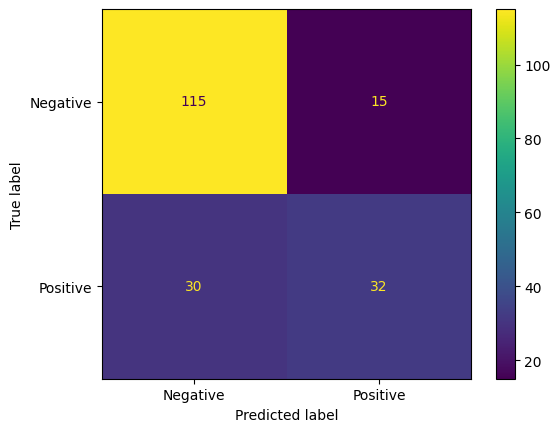

In [97]:
cm = confusion_matrix(Y_test, Y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

#### Classifcation Report

In [98]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test, Y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       130
           1       0.68      0.52      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



#### K-Fold Cross Validation 
K = 10 (picked aribtrary k)

In [99]:
scores = ['precision', 'recall', 'f1', 'accuracy']

cv_model = RandomForestClassifier(n_estimators = best_n_estimator, 
                                max_depth= int(best_max_depth), 
                                min_samples_split= best_min_samples_splits,
                                min_samples_leaf= best_min_samples_leafs, 
                                max_features= best_max_features, 
                                random_state=0)

cv_results = cross_validate(cv_model, X, Y, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.261082    0.017472        0.652174     0.555556  0.600000       0.740260
1  0.250599    0.016973        0.705882     0.444444  0.545455       0.740260
2  0.256590    0.019968        0.653846     0.629630  0.641509       0.753247
3  0.353434    0.022963        0.520000     0.481481  0.500000       0.662338
4  0.266074    0.017971        0.714286     0.370370  0.487805       0.727273
5  0.245108    0.017972        0.730769     0.703704  0.716981       0.805195
6  0.265575    0.017472        0.789474     0.555556  0.652174       0.792208
7  0.287040    0.017971        0.772727     0.629630  0.693878       0.805195
8  0.249601    0.021965        0.681818     0.576923  0.625000       0.763158
9  0.277056    0.017971        0.727273     0.615385  0.666667       0.789474

In [100]:
# Average Statistics
cv_df.mean()

fit_time          0.271216
score_time        0.018870
test_precision    0.694825
test_recall       0.556268
test_f1           0.612947
test_accuracy     0.757861
dtype: float64

#### ROC/AUC and Precision Recall Plotting

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



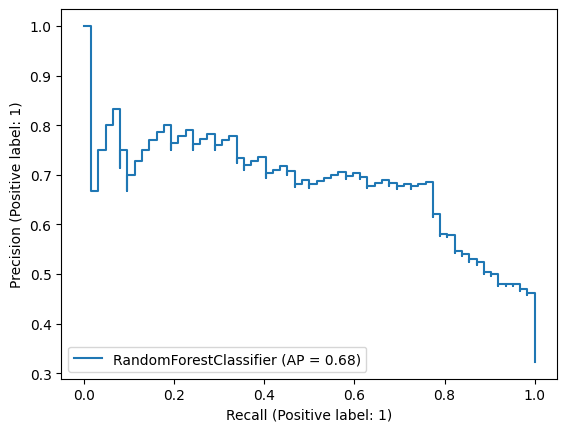

In [101]:
plot_precision_recall_curve(clf, X_test, Y_test);

In [102]:
plot_roc_curve(clf, X_test, Y_test);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



#### Feature importance based on mean decrease in impurity

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each model.

In [103]:
feature_names = np.array(X_train.columns)
importances = clf.feature_importances_
std = np.std([estimator.feature_importances_ for estimator in clf.estimators_], axis=0)
clf_importances = pd.Series(importances, index=feature_names).sort_values(ascending = False)


In [104]:
clf_importances

plas                                  0.538558
mass                                  0.146838
age                                   0.146445
glucose_class_Pre_diabetes_glucose    0.050411
glucose_class_Normal_glucose          0.038327
pedi                                  0.027294
bmi_class_Obese                       0.016706
preg                                  0.016333
skin                                  0.008489
insu                                  0.006123
bmi_class_Normal                      0.001490
pres                                  0.001367
bmi_class_Overweight                  0.000838
bp_class_Elevated_BP                  0.000564
bp_class_Normal_BP                    0.000217
bmi_class_Underweight                 0.000000
insulin_class_Abnormal_Insulin        0.000000
insulin_class_Normal                  0.000000
bp_class_High_BP                      0.000000
glucose_class_Diabetes_glucose        0.000000
dtype: float64

In [105]:
sns.barplot(x = clf_importances.values, y = clf_importances.index)
plt.title("Feature importances using Mean Decrease Impurity (MDI)")
plt.xlabel("MDI")
plt.show()

#### Permuation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [106]:
clf = RandomForestClassifier(n_estimators = best_n_estimator, 
                                max_depth= int(best_max_depth), 
                                min_samples_split= best_min_samples_splits,
                                min_samples_leaf= best_min_samples_leafs, 
                                max_features= best_max_features, 
                                random_state=0).fit(X_train, Y_train)


perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [107]:
perm_dict = dict(feature_names=X.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

In [108]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [109]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]
fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig


### RandomGridSearch Tuned Model on Filtered Data

In [278]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [110]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 500, num = 30)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [111]:
clf = RandomForestClassifier(random_state = 0)

rf_random = RandomizedSearchCV(estimator = clf, 
                                param_distributions = random_grid, 
                                n_iter = 50, # increase for better results but can take long to run
                                cv = 10, 
                                verbose=2, 
                                random_state=0, 
                                n_jobs = -1)

In [112]:
# run only once pls
#rf_random.fit(X_train_filt, Y_train_filt)
#rf_random.best_params_

In [113]:
# incase results are lost 
grid_results = {'n_estimators': 1310,
                'min_samples_split': 10,
                'min_samples_leaf': 2,
                'max_features': 'sqrt',
                'max_depth': 50,
                'bootstrap': True}

#### Random Grid Search Tuned Model on Filtered Data 

In [114]:
clf = RandomForestClassifier(n_estimators = 1310, 
                                max_depth= 50, 
                                min_samples_split= 10,
                                min_samples_leaf= 2, 
                                max_features= 'sqrt', 
                                random_state=0).fit(X_train_filt, Y_train_filt)
clf.fit(X_train_filt, Y_train_filt) 
Y_preds_filt = clf.predict(X_test_filt)                        

#### Results

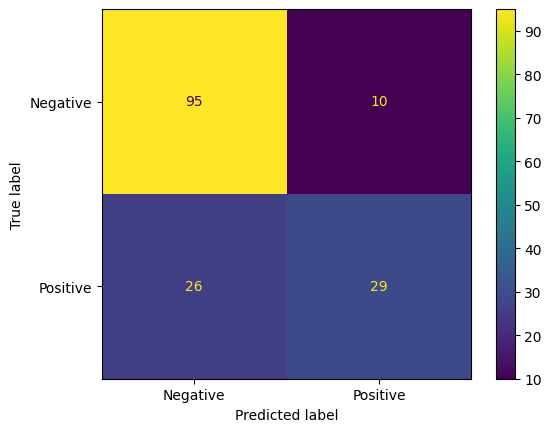

In [115]:
cm = confusion_matrix(Y_test_filt, Y_preds_filt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

#### Classification Report

In [116]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test_filt, Y_preds_filt)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.74      0.53      0.62        55

    accuracy                           0.78       160
   macro avg       0.76      0.72      0.73       160
weighted avg       0.77      0.78      0.76       160



#### K-Fold Cross Validation

In [117]:
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = RandomForestClassifier(n_estimators = 1310, 
                                max_depth= 50, 
                                min_samples_split= 10,
                                min_samples_leaf= 2, 
                                max_features= 'sqrt', 
                                random_state=0).fit(X_train_filt, Y_train_filt)
cv_results = cross_validate(cv_model, X_filt, Y_filt, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  1.557007    0.101837        0.650000         0.65  0.650000       0.781250
1  1.558006    0.124301        0.833333         0.50  0.625000       0.812500
2  1.468150    0.125798        0.533333         0.40  0.457143       0.703125
3  1.659343    0.105830        0.647059         0.55  0.594595       0.765625
4  1.770665    0.102336        0.750000         0.45  0.562500       0.781250
5  1.468649    0.098842        0.733333         0.55  0.628571       0.796875
6  1.445686    0.103335        0.750000         0.45  0.562500       0.781250
7  1.473641    0.104333        0.800000         0.60  0.685714       0.828125
8  1.545027    0.117812        0.714286         0.50  0.588235       0.781250
9  1.529551    0.099840        0.846154         0.55  0.666667       0.825397

In [118]:
# Average Statistics
cv_df.mean()

fit_time          1.547573
score_time        0.108427
test_precision    0.725750
test_recall       0.520000
test_f1           0.602093
test_accuracy     0.785665
dtype: float64

#### ROC/AUC and Precision Recall Plotting

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



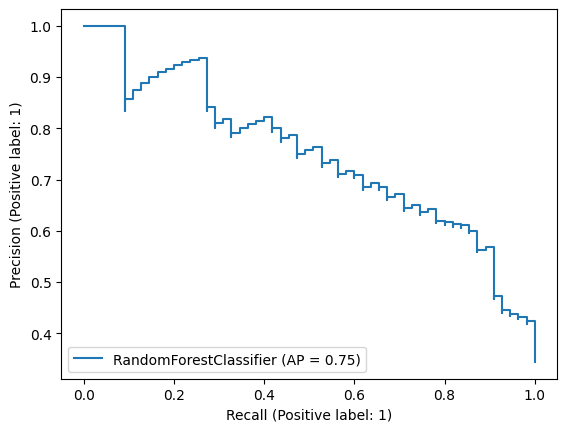

In [119]:
plot_precision_recall_curve(clf, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



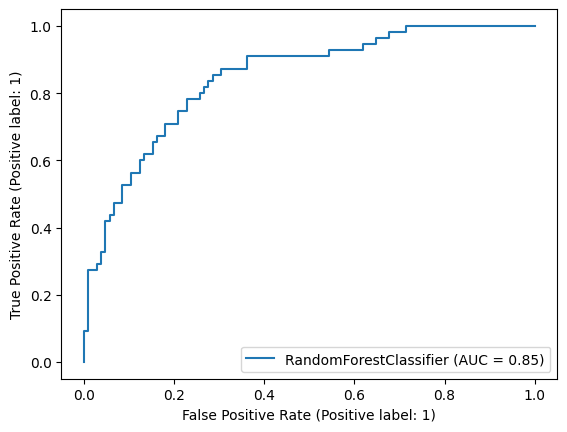

In [120]:
plot_roc_curve(clf, X_test_filt, Y_test_filt);

#### Feature importance based on mean decrease in impurity

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each model.

In [121]:
feature_names = np.array(X_train_filt.columns)
importances = clf.feature_importances_
std = np.std([estimator.feature_importances_ for estimator in clf.estimators_], axis=0)
clf_importances = pd.Series(importances, index=feature_names).sort_values(ascending = False)


In [122]:
clf_importances

plas                                  0.228928
age                                   0.109836
mass                                  0.105893
pedi                                  0.105048
preg                                  0.075922
glucose_class_Pre_diabetes_glucose    0.070408
glucose_class_Normal_glucose          0.062820
pres                                  0.054883
insu                                  0.052612
skin                                  0.050496
bmi_class_Obese                       0.028663
insulin_class_Normal                  0.009277
bmi_class_Overweight                  0.009106
bmi_class_Normal                      0.008800
bp_class_Elevated_BP                  0.008796
insulin_class_Abnormal_Insulin        0.008664
bp_class_Normal_BP                    0.006464
bp_class_High_BP                      0.003361
bmi_class_Underweight                 0.000021
dtype: float64

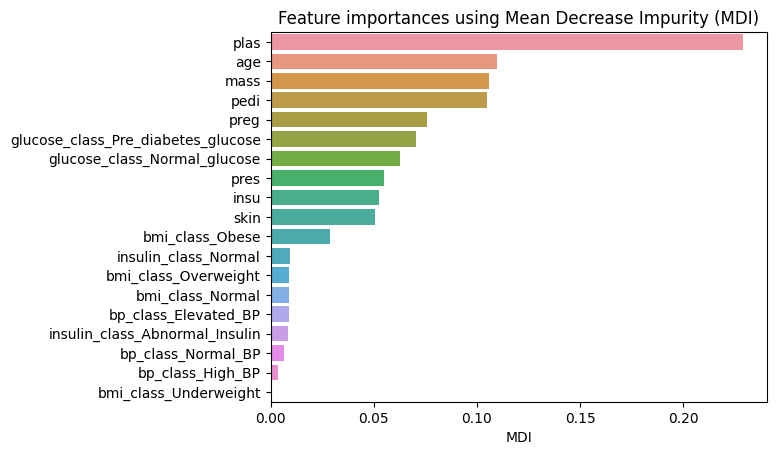

In [123]:
sns.barplot(x = clf_importances.values, y = clf_importances.index)
plt.title("Feature importances using Mean Decrease Impurity (MDI)")
plt.xlabel("MDI")
plt.show()

#### Permutation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [124]:
#took out eli5
clf = RandomForestClassifier(random_state=0).fit(X_train_filt, Y_train_filt)
perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test_filt, Y_test_filt)
eli5.show_weights(perm, feature_names = X_test_filt.columns.tolist())

In [125]:
perm_dict = dict(feature_names=X_filt.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

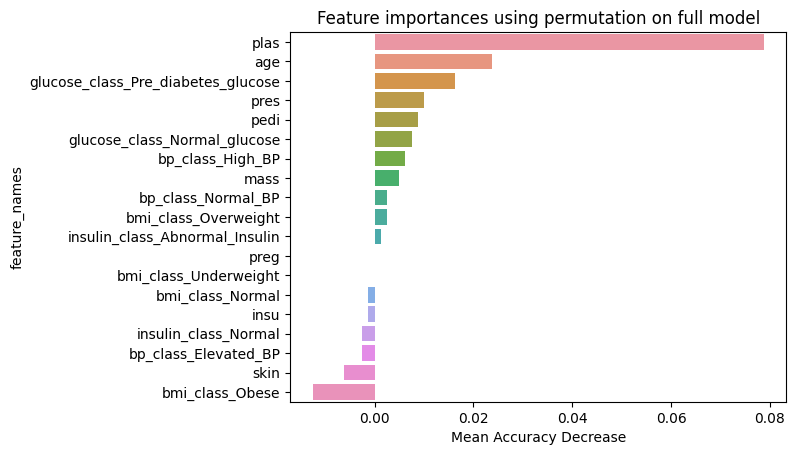

In [126]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



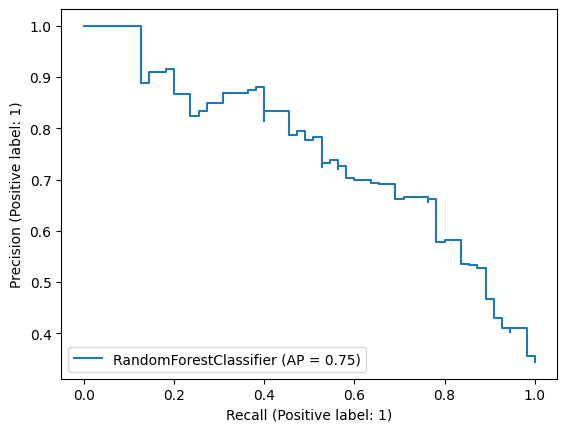

In [127]:
plot_precision_recall_curve(clf, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



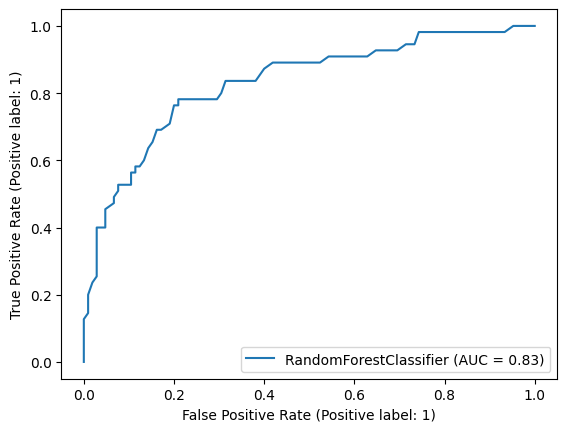

In [128]:
plot_roc_curve(clf, X_test_filt, Y_test_filt);

#### Feature importance based on mean decrease in impurity

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each model.

In [129]:
feature_names = np.array(X_train_filt.columns)
importances = clf.feature_importances_
std = np.std([estimator.feature_importances_ for estimator in clf.estimators_], axis=0)
clf_importances = pd.Series(importances, index=feature_names).sort_values(ascending = False)


In [130]:
clf_importances

plas                                  2.003992e-01
pedi                                  1.152434e-01
age                                   1.131440e-01
mass                                  1.111353e-01
preg                                  8.487336e-02
pres                                  7.863941e-02
skin                                  6.662266e-02
insu                                  5.691592e-02
glucose_class_Pre_diabetes_glucose    4.598249e-02
glucose_class_Normal_glucose          3.919019e-02
bmi_class_Obese                       2.380880e-02
insulin_class_Abnormal_Insulin        1.355298e-02
bp_class_Elevated_BP                  1.053732e-02
bp_class_Normal_BP                    9.528902e-03
bmi_class_Overweight                  9.339628e-03
insulin_class_Normal                  9.277328e-03
bmi_class_Normal                      7.116308e-03
bp_class_High_BP                      4.692284e-03
bmi_class_Underweight                 5.129670e-07
dtype: float64

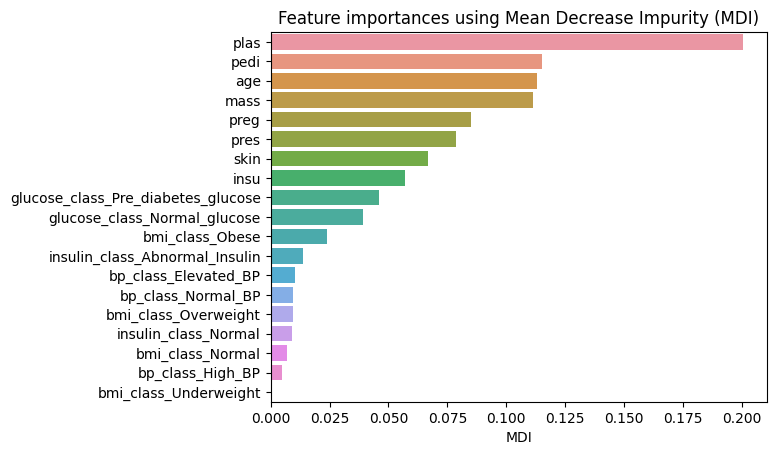

In [131]:
sns.barplot(x = clf_importances.values, y = clf_importances.index)
plt.title("Feature importances using Mean Decrease Impurity (MDI)")
plt.xlabel("MDI")
plt.show()

#### Permutation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [132]:
#took out eli5
clf = RandomForestClassifier(random_state=0).fit(X_train_filt, Y_train_filt)
perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test_filt, Y_test_filt)
eli5.show_weights(perm, feature_names = X_test_filt.columns.tolist())

In [133]:
perm_dict = dict(feature_names=X_filt.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [134]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test_filt.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]

fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig

## Support Vector Machine Model (SVM)

### Support Vector Classifier (SVC) tuned w/ GridSearch on Unfiltered Data

In [135]:
svc = SVC(random_state = 0)                                         
svc.fit(X_train, Y_train)                                    
acc_svc = svc.score(X_train, Y_train)

print('Training labeling accuracy:', str(round(acc_svc*100,2)),'%')

Training labeling accuracy: 83.85 %


In [136]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)
grid.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.690 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.661 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.783 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.609 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.696 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.603 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [137]:
#incase results get lost
grid_results = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
grid_results

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

#### GridSearch Tuned Model on Unfiltered Data

In [138]:
clf = SVC(C = 100, gamma = 0.01, kernel = 'rbf', random_state = 0)
clf.fit(X_train, Y_train) 
Y_preds = clf.predict(X_test)

#### Results

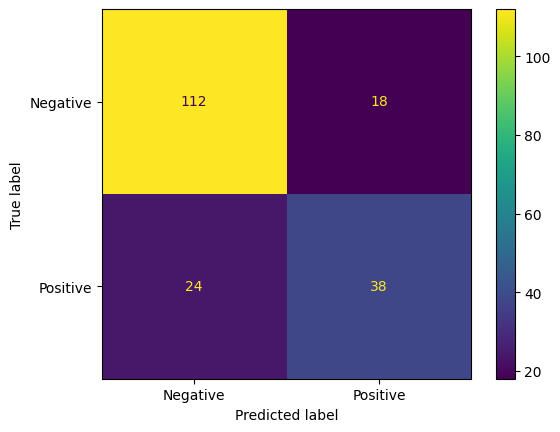

In [139]:
cm = confusion_matrix(Y_test, Y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

#### Classification Report

In [140]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test, Y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       130
           1       0.68      0.61      0.64        62

    accuracy                           0.78       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.78      0.78      0.78       192



#### K-Fold Cross Validation 
K = 10 (picked aribtrary k)

In [141]:
scores = ['precision', 'recall', 'f1', 'accuracy']

cv_model = SVC(C = 100, gamma = 0.01, kernel = 'rbf', random_state = 0)  

cv_results = cross_validate(cv_model, X, Y, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.019968    0.005991        0.560000     0.518519  0.538462       0.688312
1  0.022464    0.005991        0.800000     0.444444  0.571429       0.766234
2  0.021965    0.005491        0.789474     0.555556  0.652174       0.792208
3  0.018471    0.005491        0.571429     0.592593  0.581818       0.701299
4  0.019469    0.005491        0.750000     0.444444  0.558140       0.753247
5  0.019469    0.005491        0.750000     0.555556  0.638298       0.779221
6  0.020468    0.005991        0.850000     0.629630  0.723404       0.831169
7  0.019968    0.005491        0.730769     0.703704  0.716981       0.805195
8  0.018970    0.005491        0.588235     0.384615  0.465116       0.697368
9  0.018970    0.005491        0.782609     0.692308  0.734694       0.828947

In [142]:
# Average Statistics
cv_df.mean()

fit_time          0.020018
score_time        0.005641
test_precision    0.717252
test_recall       0.552137
test_f1           0.618052
test_accuracy     0.764320
dtype: float64

#### ROC/AUC and Precision Recall Plotting

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



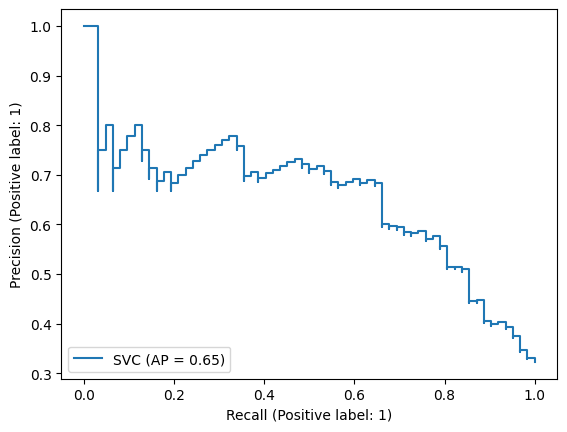

In [143]:
plot_precision_recall_curve(clf, X_test, Y_test);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



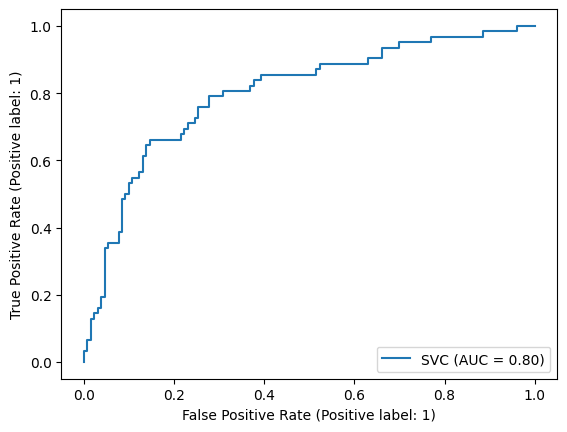

In [144]:
plot_roc_curve(clf, X_test, Y_test);

#### Permuation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [145]:
clf = SVC(C = 100, gamma = 0.01, kernel = 'rbf').fit(X_train, Y_train)  

perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [146]:
perm_dict = dict(feature_names=X.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

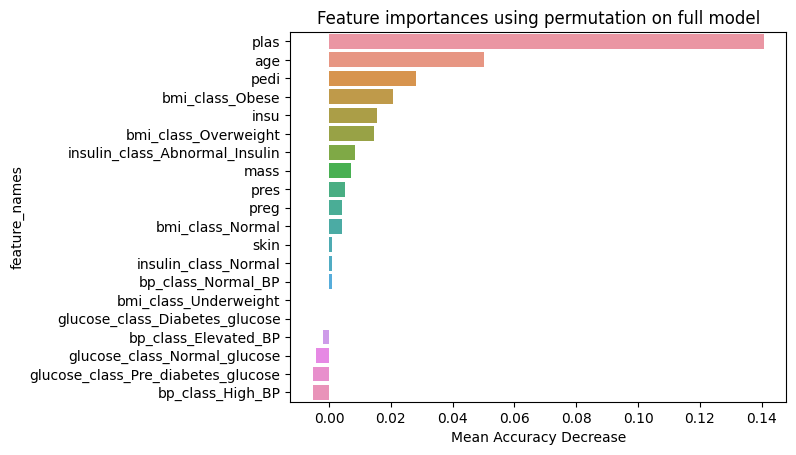

In [147]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [148]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]
fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig


### Support Vector Classifier (SVC) tuned w/ GridSearch on Filtered Data

In [149]:
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')                                         
svc.fit(X_train_filt, Y_train_filt)                                    
acc_svc = svc.score(X_train_filt, Y_train_filt)  

print('Training labeling accuracy:', str(round(acc_svc*100,2)),'%')

Training labeling accuracy: 84.76 %


In [150]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_filt, Y_train_filt)
grid.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.656 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.656 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.688 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.698 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.747 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [151]:
#incase results get lost
grid_results = {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

#### GridSearch Tuned Model on Filtered Data

In [152]:
clf = SVC(C = 1000, gamma = 0.001, kernel = 'rbf', random_state = 0)
clf.fit(X_train_filt, Y_train_filt) 
Y_preds_filt = clf.predict(X_test_filt)   

#### Results

In [153]:
cm = confusion_matrix(Y_test_filt, Y_preds_filt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

In [154]:
#### Classification Report

In [155]:
#Includes accuracy, precision, recall, f1-score (both marco and micro)
report = classification_report(Y_test_filt, Y_preds_filt)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       105
           1       0.74      0.47      0.58        55

    accuracy                           0.76       160
   macro avg       0.76      0.69      0.71       160
weighted avg       0.76      0.76      0.75       160



#### K-Fold Cross Validation

In [156]:
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = SVC(C = 1000, gamma = 0.001, kernel = 'rbf', random_state = 0)

cv_df = pd.DataFrame(cv_results) 
cv_df

fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.019968    0.005991        0.560000     0.518519  0.538462       0.688312
1  0.022464    0.005991        0.800000     0.444444  0.571429       0.766234
2  0.021965    0.005491        0.789474     0.555556  0.652174       0.792208
3  0.018471    0.005491        0.571429     0.592593  0.581818       0.701299
4  0.019469    0.005491        0.750000     0.444444  0.558140       0.753247
5  0.019469    0.005491        0.750000     0.555556  0.638298       0.779221
6  0.020468    0.005991        0.850000     0.629630  0.723404       0.831169
7  0.019968    0.005491        0.730769     0.703704  0.716981       0.805195
8  0.018970    0.005491        0.588235     0.384615  0.465116       0.697368
9  0.018970    0.005491        0.782609     0.692308  0.734694       0.828947

In [157]:
# Average Statistics
cv_df.mean()

fit_time          0.020018
score_time        0.005641
test_precision    0.717252
test_recall       0.552137
test_f1           0.618052
test_accuracy     0.764320
dtype: float64

#### ROC/AUC and Precision Recall Plotting

In [158]:
plot_precision_recall_curve(clf, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



In [159]:
plot_roc_curve(clf, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



#### Permuation Importance 
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [160]:
clf = SVC(C = 1000, gamma = 0.001, kernel = 'rbf', random_state = 0).fit(X_train_filt, Y_train_filt)
perm = eli5.sklearn.PermutationImportance(clf, random_state=0).fit(X_test_filt, Y_test_filt)
eli5.show_weights(perm, feature_names = X_test_filt.columns.tolist())

In [161]:
perm_dict = dict(feature_names=X_filt.columns.tolist(), mean = perm.feature_importances_, std = perm.feature_importances_std_)
perm_df = pd.DataFrame(perm_dict).sort_values(by = 'mean', ascending = False)

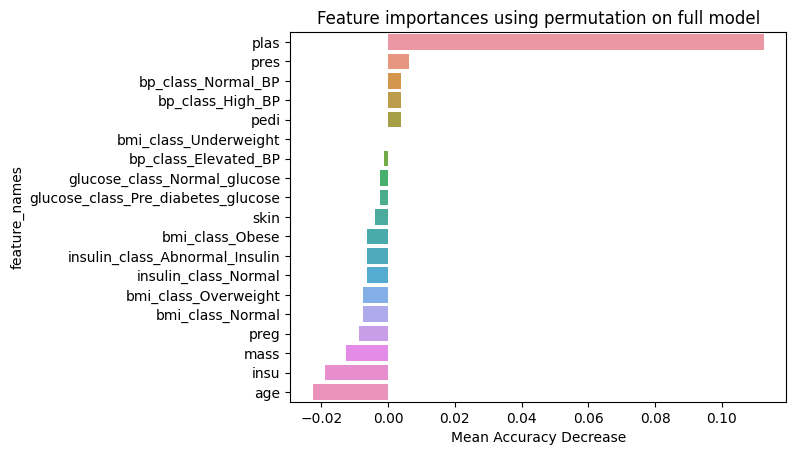

In [162]:
sns.barplot(x = perm_df['mean'], y = perm_df['feature_names'])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

In [163]:
results_df = pd.DataFrame(data = perm.results_, columns = X_test_filt.columns)
feat_imps = results_df.mean().sort_values(ascending=False)
results_df = results_df[results_df.mean().sort_values().index]

fig = px.box(results_df.melt(), x='value', y = 'variable', orientation='h')
fig.add_trace(go.Scatter(x=feat_imps.values, y=feat_imps.index, mode='markers', marker=dict(color='black'), name = 'Mean'))
fig

## Logisitic Regression with Random Grid Search

In [164]:
#Parameter search spaces
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

lr = LogisticRegression(max_iter=2022, random_state=42)

lr_random = RandomizedSearchCV(estimator = lr,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

lr_random.fit(X_train, Y_train)
lr_random.score(X_train, Y_train)
lr_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'warm_start': False, 'solver': 'lbfgs', 'max_iter': 185, 'C': 0.02}

In [165]:
Y_preds = lr_random.predict(X_test)
report = classification_report(Y_test, Y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.53      0.62        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.78       192



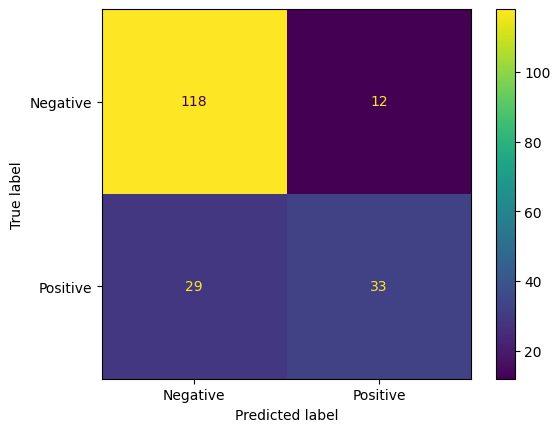

In [166]:
cm = confusion_matrix(Y_test, Y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

In [167]:
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = lr_random
cv_results = cross_validate(cv_model, X, Y, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.608526    0.002995        0.653846     0.629630  0.641509       0.753247
1  0.640475    0.002995        0.705882     0.444444  0.545455       0.740260
2  0.649460    0.004992        0.700000     0.518519  0.595745       0.753247
3  0.635982    0.002995        0.555556     0.555556  0.555556       0.688312
4  0.642971    0.003994        0.769231     0.370370  0.500000       0.740260
5  0.605031    0.002496        0.800000     0.592593  0.680851       0.805195
6  0.585563    0.002995        0.736842     0.518519  0.608696       0.766234
7  0.650958    0.002995        0.761905     0.592593  0.666667       0.792208
8  0.623003    0.002996        0.611111     0.423077  0.500000       0.710526
9  0.642971    0.002995        0.750000     0.576923  0.652174       0.789474

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



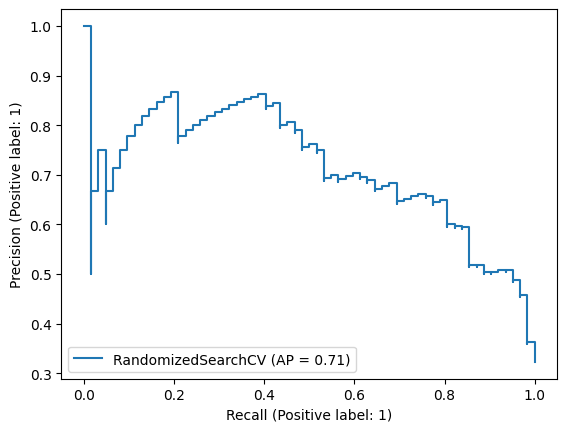

In [168]:
plot_precision_recall_curve(lr_random, X_test, Y_test);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



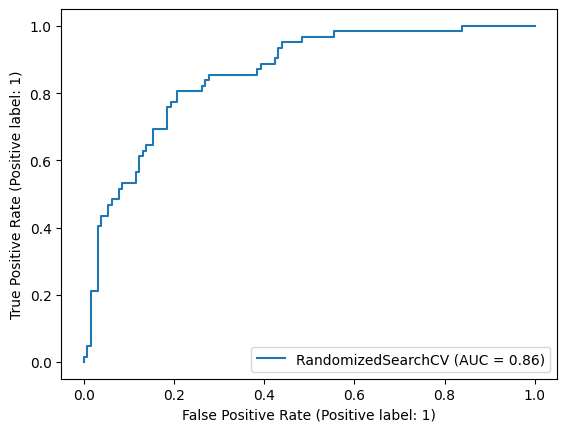

In [169]:
plot_roc_curve(lr_random, X_test, Y_test);

## Logistic Regression with Random Grid Search on Filtered Data

In [170]:
#Parameter search spaces
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

lr = LogisticRegression(max_iter=2022, random_state=42)

lr_random = RandomizedSearchCV(estimator = lr,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

lr_random.fit(X_train_filt, Y_train_filt)
lr_random.score(X_train_filt, Y_train_filt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


0.791231732776618

In [171]:
Y_preds_filt = lr_random.predict(X_test_filt)
report = classification_report(Y_test_filt, Y_preds_filt)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.76      0.51      0.61        55

    accuracy                           0.78       160
   macro avg       0.77      0.71      0.73       160
weighted avg       0.77      0.78      0.76       160



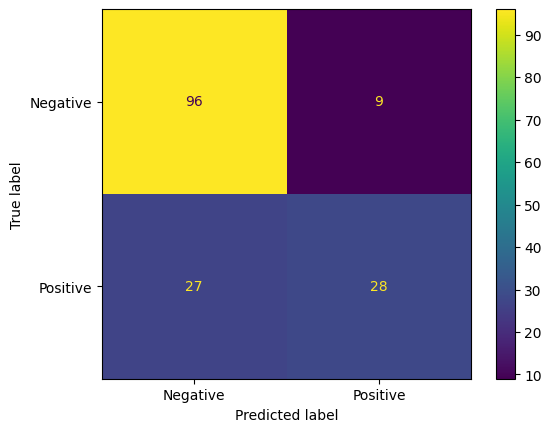

In [172]:
cm = confusion_matrix(Y_test_filt, Y_preds_filt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

In [173]:
scores = ['precision', 'recall', 'f1', 'accuracy']
cv_model = lr_random
cv_results = cross_validate(cv_model, X_filt, Y_filt, cv = 10, scoring = scores)

cv_df = pd.DataFrame(cv_results) 
cv_df

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


fit_time  score_time  test_precision  test_recall   test_f1  test_accuracy
0  0.656450    0.003494        0.666667         0.50  0.571429       0.765625
1  0.640475    0.002497        0.777778         0.35  0.482759       0.765625
2  0.615016    0.003494        0.600000         0.45  0.514286       0.734375
3  0.604032    0.003495        0.625000         0.50  0.555556       0.750000
4  0.619508    0.002995        0.727273         0.40  0.516129       0.765625
5  0.661442    0.003994        0.714286         0.50  0.588235       0.781250
6  0.649460    0.002995        0.700000         0.35  0.466667       0.750000
7  0.646465    0.002995        0.833333         0.50  0.625000       0.812500
8  0.649460    0.003993        0.642857         0.45  0.529412       0.750000
9  0.642970    0.002995        0.900000         0.45  0.600000       0.809524

In [174]:
# Average Statistics
cv_df.mean()

fit_time          0.638528
score_time        0.003295
test_precision    0.718719
test_recall       0.445000
test_f1           0.544947
test_accuracy     0.768452
dtype: float64

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



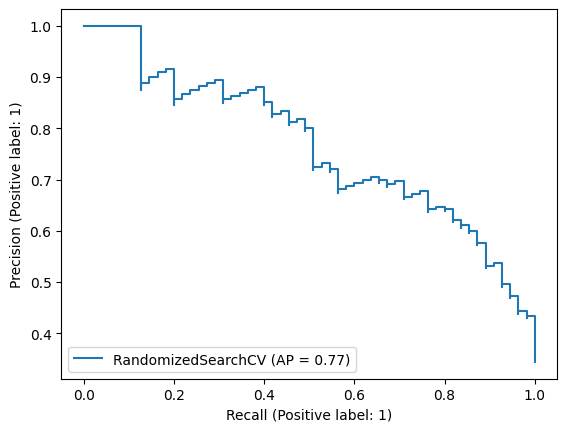

In [175]:
plot_precision_recall_curve(lr_random, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



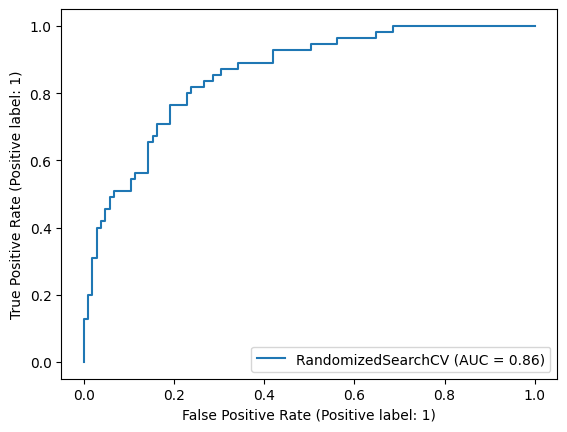

In [176]:
plot_roc_curve(lr_random, X_test_filt, Y_test_filt);

## Neural Network with Random Grid Search

In [177]:
#Parameter search spaces
hidden_layer_sizes = [tuple([x, 1]) for x in np.arange(5, 100)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
batch_size = np.arange(5, 200, 5)
random_grid ={
    'hidden_layer_sizes' : max_iter,
    'activation' : activation,
    'solver' : solver,
    'batch_size' : batch_size
}

nn = MLPClassifier()

nn_random = RandomizedSearchCV(estimator = nn,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

nn_random.fit(X_train, Y_train)
nn_random.score(X_train, Y_train)
nn_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



{'solver': 'adam',
 'hidden_layer_sizes': 399,
 'batch_size': 25,
 'activation': 'tanh'}

In [178]:
Y_preds = nn_random.predict(X_test)
report = classification_report(Y_test, Y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       130
           1       0.69      0.66      0.68        62

    accuracy                           0.80       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.79      0.80      0.80       192



In [179]:
cm = confusion_matrix(Y_test, Y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

In [180]:
plot_precision_recall_curve(nn_random, X_test, Y_test);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



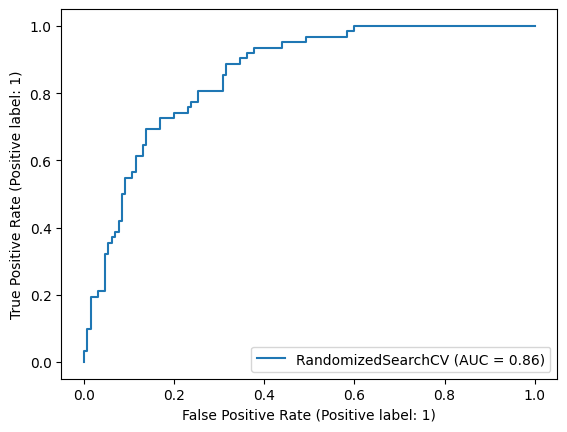

In [181]:
plot_roc_curve(nn_random, X_test, Y_test);

## Neural Network with Random Grid Search on Filtered Data

In [182]:
#Parameter search spaces
hidden_layer_sizes = [tuple([x, 1]) for x in np.arange(5, 100)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
batch_size = np.arange(5, 200, 5)
random_grid ={
    'hidden_layer_sizes' : max_iter,
    'activation' : activation,
    'solver' : solver,
    'batch_size' : batch_size
}

nn = MLPClassifier()

nn_random = RandomizedSearchCV(estimator = nn,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

nn_random.fit(X_train_filt, Y_train_filt)
nn_random.score(X_train_filt, Y_train_filt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.7933194154488518

In [183]:
Y_preds_filt = nn_random.predict(X_test_filt)
report = classification_report(Y_test_filt, Y_preds_filt)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.76      0.53      0.62        55

    accuracy                           0.78       160
   macro avg       0.78      0.72      0.73       160
weighted avg       0.78      0.78      0.77       160



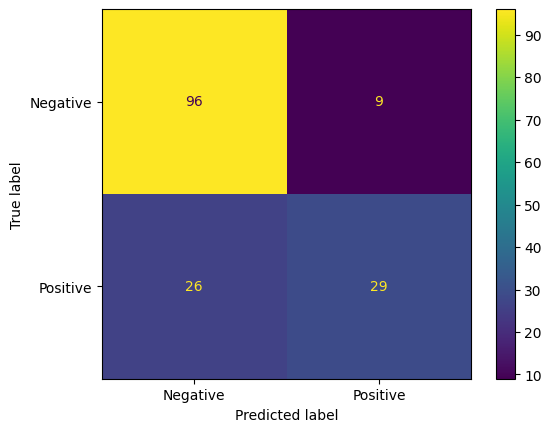

In [184]:
cm = confusion_matrix(Y_test_filt, Y_preds_filt)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot();

In [185]:
plot_precision_recall_curve(nn_random, X_test_filt, Y_test_filt);

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



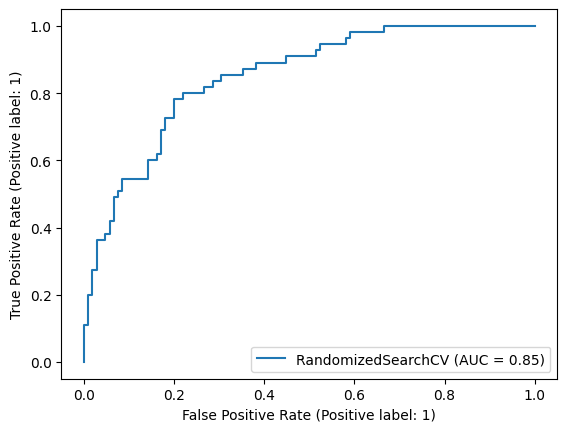

In [186]:
plot_roc_curve(nn_random, X_test_filt, Y_test_filt);

# Unsupervised Modeling 

### K-means

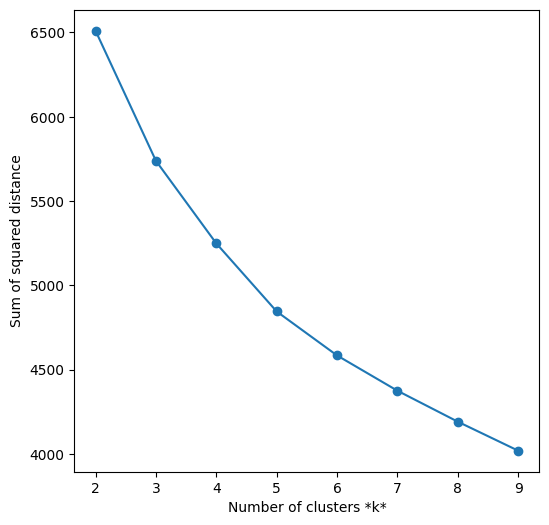

In [187]:
sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [188]:
list_k = list(range(2, 10))
scores = []

    
for k in list_k:  
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(df)
    labels = km.labels_  
    score = silhouette_score(df, labels) 
    scores += [score]
        
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score');

In [189]:
optimal_k = 2
km = KMeans(n_clusters = optimal_k, random_state = 0)
km.fit(df)
clusters = km.predict(df)

#### Plotting w/ PCA

In [190]:
cluster_df = df.copy() 
cluster_df['cluster'] = clusters

pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(cluster_df.drop(["cluster"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

cluster_df = pd.concat([cluster_df, PCs_2d], axis = 1, join = 'inner')

In [191]:
title = "Visualizing Clusters Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = px.scatter(cluster_df, x="PC1_2d", y="PC2_2d", color="cluster", symbol='diabetes', title = title)            
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig

#### Plotting w/ t-SNE

In [192]:
cluster_df = df.copy() 
cluster_df['cluster'] = clusters

In [193]:
tsne_2d = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut')
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(cluster_df.drop(['cluster'], axis=1)))

TCs_2d.columns = ["TC1_2d","TC2_2d"]
cluster_df = pd.concat([cluster_df, TCs_2d], axis = 1, join = 'inner')

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.000s...
[t-SNE] Computed neighbors for 768 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 1.210211
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 62.9404373, gradient norm = 0.3610342 (50 iterations in 0.205s)
[t-SNE] Iteration 100: error = 62.4603500, gradient norm = 0.3505281 (50 iterations in 0.199s)
[t-SNE] Iteration 150: error = 63.1819839, gradient norm = 0.3511666 (50 iterations in 0.240s)
[t-SNE] Iteration 200: error = 63.2371140, gradient norm = 0.3550212 (50 iterations in 0.229s)
[t-SNE] Iteration 250: error = 62.6304474, gradient norm = 0.3460525 (50 iterations in 0.228s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.630447
[t-SNE] Iteration 300: error = 1.0325701, gradient norm = 0.0013157 (50 iterations in 0.173s)
[t-SNE] Iteration 350: error = 0.9351498, gradient norm = 0.0008453 

In [194]:
title = "Visualizing Clusters Using t-SNE"

layout = dict(title = title,
              xaxis= dict(title= 't-SNE1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 't-SNE2',ticklen= 5,zeroline= False)
             )

fig = px.scatter(cluster_df, x="TC1_2d", y="TC2_2d", color="cluster", symbol='diabetes', title = title)            
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig

### Spectral Clustering

In [195]:
sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0)
sp.fit(df)
clusters = sp.labels_


#### Plotting w/ PCA

In [196]:
cluster_df = df.copy() 
cluster_df['cluster'] = clusters

pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(cluster_df.drop(["cluster"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

cluster_df = pd.concat([cluster_df, PCs_2d], axis = 1, join = 'inner')

In [197]:
title = "Visualizing Clusters Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = px.scatter(cluster_df, x="PC1_2d", y="PC2_2d", color="cluster", symbol='diabetes', title = title)            
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig

#### Plotting w/ t-SNE

In [198]:
cluster_df = df.copy() 
cluster_df['cluster'] = clusters

In [199]:
tsne_2d = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut')
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(cluster_df.drop(['cluster'], axis=1)))

TCs_2d.columns = ["TC1_2d","TC2_2d"]
cluster_df = pd.concat([cluster_df, TCs_2d], axis = 1, join = 'inner')

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.000s...
[t-SNE] Computed neighbors for 768 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 1.210211
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 62.1344986, gradient norm = 0.3699939 (50 iterations in 0.268s)
[t-SNE] Iteration 100: error = 62.5538635, gradient norm = 0.3508005 (50 iterations in 0.235s)
[t-SNE] Iteration 150: error = 62.4677010, gradient norm = 0.3514650 (50 iterations in 0.262s)
[t-SNE] Iteration 200: error = 62.5306206, gradient norm = 0.3563908 (50 iterations in 0.224s)
[t-SNE] Iteration 250: error = 63.2815895, gradient norm = 0.3528112 (50 iterations in 0.231s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.281590
[t-SNE] Iteration 300: error = 1.0090100, gradient norm = 0.0016103 (50 iterations in 0.185s)
[t-SNE] Iteration 350: error = 0.9340073, gradient norm = 0.0007617 

In [200]:
title = "Visualizing Clusters Using t-SNE"

layout = dict(title = title,
              xaxis= dict(title= 't-SNE1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 't-SNE2',ticklen= 5,zeroline= False)
             )

fig = px.scatter(cluster_df, x="TC1_2d", y="TC2_2d", color="cluster", symbol='diabetes', title = title)            
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cfa8a11-0774-4430-ad83-364ee590586f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>